In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from collections import Iterable
import random
from os import listdir
from os.path import isfile, join
import matplotlib.patches as mpatches


import scipy.stats as st

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

D:\Users\glede\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


# Calculations for stats and plots are based on: https://github.com/stasmix/popsynth/blob/master/pop-synth-vae.ipynb

# Load the files

In [3]:
dataset = 'Chicago'

In [4]:
synth_dir = '../synth_data/' + dataset

files = ['../data/' + dataset + '/data.csv']
labels = ['original']

for f in listdir(synth_dir):
    if isfile(join(synth_dir, f)):
        files.append(join(synth_dir, f))
        labels.append(f.split('.')[0])

In [5]:
labels

['original',
 'CTGAN',
 'CTGAN_1k',
 'DATGAN_1k',
 'DATGAN_1k2',
 'DATGAN_1k3',
 'DATGAN_1k4',
 'DATGAN_argmax',
 'DATGAN_asd1',
 'DATGAN_asd10',
 'DATGAN_asd11',
 'DATGAN_asd12',
 'DATGAN_asd13',
 'DATGAN_asd14',
 'DATGAN_asd15',
 'DATGAN_asd16',
 'DATGAN_asd17',
 'DATGAN_asd18',
 'DATGAN_asd19',
 'DATGAN_asd2',
 'DATGAN_asd20',
 'DATGAN_asd21',
 'DATGAN_asd22',
 'DATGAN_asd23',
 'DATGAN_asd24',
 'DATGAN_asd25',
 'DATGAN_asd26',
 'DATGAN_asd27',
 'DATGAN_asd28',
 'DATGAN_asd29',
 'DATGAN_asd3',
 'DATGAN_asd4',
 'DATGAN_asd5',
 'DATGAN_asd6',
 'DATGAN_asd7',
 'DATGAN_asd8',
 'DATGAN_asd9',
 'DATGAN_CTGAN_ENC',
 'DATGAN_hybrid',
 'DATGAN_large',
 'DATGAN_newcont',
 'DATGAN_newcont2',
 'DATGAN_newcont3',
 'DATGAN_NEW_ENC',
 'DATGAN_noise_argmax',
 'DATGAN_noise_simu',
 'DATGAN_nonoise_argmax',
 'DATGAN_nonoise_simu',
 'DATGAN_nonoise_simu_v2',
 'DATGAN_PandD',
 'DATGAN_PandD2',
 'DATGAN_PandD3',
 'DATGAN_scalar',
 'DATGAN_seminoise_argmax',
 'DATGAN_seminoise_argmax_v2',
 'DATGAN_seminoi

In [6]:
dfs = [pd.read_csv(file) for file in files]

In [7]:
if dataset is 'Chicago':
    continuous_cols = ['distance', 'age', 'departure_time']
elif dataset is 'LPMC':
    continuous_cols = ['start_time_linear', 'age', 'distance', 'dur_walking', 'dur_cycling', 'dur_pt_access', 'dur_pt_rail', 'dur_pt_bus', 'dur_pt_int', 'dur_driving', 'cost_transit', 'cost_driving_fuel', 'driving_traffic_percent']

In [8]:
dfs[0]

choice  travel_dow trip_purpose  distance  hh_vehicles  hh_size  \
0      drive           7   HOME_OTHER  23.42579            2        2   
1      drive           7        OTHER   1.71259            2        2   
2      drive           7   HOME_OTHER  21.77887            2        2   
3      drive           7     SHOPPING   2.02603            2        2   
4      drive           7     SHOPPING   0.87691            2        2   
...      ...         ...          ...       ...          ...      ...   
87941  drive           2        OTHER   2.42141            1        1   
87942  drive           2   HOME_OTHER   1.16283            1        1   
87943  drive           2   HOME_OTHER   0.54234            1        1   
87944  drive           2        OTHER   1.49183            1        1   
87945  drive           2   HOME_OTHER   1.23051            1        1   

       hh_bikes  hh_descr  hh_income  gender  age  license  education_level  \
0             0         2          6       1   66      1.0                6   
1             0         2          6       1   66      1.0                6   
2             0         2          6       1   66      1.0                6   
3             0         2          6       1   66      1.0                6   
4             0         2          6       1   66      1.0                6   
...         ...       ...        ...     ...  ...      ...              ...   
87941         0         1          3       0   59      1.0                4   
87942         0         1          3       0   59      1.0                4   
87943         0         1          3       0   59      1.0                4   
87944         0         1          3       0   59      1.0                4   
87945         0         1          3       0   59      1.0                4   

      work_status  departure_time  
0             FTE        9.333333  
1             FTE       12.083333  
2             FTE       15.500000  
3             FTE       17.500000  
4             FTE       18.250000  
...           ...             ...  
87941         PTE       13.750000  
87942         PTE       14.083333  
87943         PTE       14.666667  
87944         PTE       15.333333  
87945         PTE       15.500000  

[87946 rows x 15 columns]

# Transform all values in numerical

In [9]:
dfs[0].dtypes

choice              object
travel_dow           int64
trip_purpose        object
distance           float64
hh_vehicles          int64
hh_size              int64
hh_bikes             int64
hh_descr             int64
hh_income            int64
gender               int64
age                  int64
license            float64
education_level      int64
work_status         object
departure_time     float64
dtype: object

In [10]:
if dataset is 'Chicago':
    ints = ['travel_dow', 'hh_vehicles', 'hh_size', 'hh_bikes', 'hh_descr', 'hh_income', 'gender', 'education_level', 'age']
    floats = ['departure_time', 'distance', 'license']
    strs = ['choice', 'trip_purpose', 'work_status']
elif dataset is 'LPMC':
    ints = ['survey_year', 'travel_year', 'travel_month', 'travel_date', 'day_of_week', 'age', 'female', 'driving_license', 'car_ownership', 'distance', 'pt_n_interchanges']
    floats = ['bus_scale', 'start_time_linear', 'dur_walking', 'dur_cycling', 'dur_pt_access', 'dur_pt_rail', 'dur_pt_bus', 'dur_pt_int', 'dur_driving', 'cost_transit', 'cost_driving_fuel', 'cost_driving_con_charge', 'driving_traffic_percent']
    strs = ['travel_mode', 'purpose', 'fueltype', 'faretype']

In [11]:
dct = {}

for i in ints:
    dct[i] = 'int64'
    
for i in floats:
    dct[i] = 'float64'

In [12]:
dfs = [df.astype(dct) for df in dfs]

In [13]:
for c in strs: 
    dct = {}
    
    for n, i in enumerate(dfs[0][c].unique()):        
        dct[i] = n
        
    dfs = [df.replace(dct) for df in dfs]

In [14]:
dfs[0].dtypes

choice               int64
travel_dow           int64
trip_purpose         int64
distance           float64
hh_vehicles          int64
hh_size              int64
hh_bikes             int64
hh_descr             int64
hh_income            int64
gender               int64
age                  int64
license            float64
education_level      int64
work_status          int64
departure_time     float64
dtype: object

# Compute the stats

In [15]:
# calculate min_max_bins for an arbitrary discretization scheme
def get_min_max(data1, data2, num_bins, cont_cols):
    """
    Create a dictionnary with all variables indicating the number of bins and the min and max value 
    """
    
    min_max = {}
    eps = 1e-10
    
    # Go through all columns in the first dataset (assuming data2 has the same columns)
    for c in data1.columns:
        if c in cont_cols: # Continuous column
            
            # Compute min and max values between both datasets
            min_val = min(np.min(data1[c]), np.min(data2[c])) - eps
            max_val = max(np.max(data1[c]), np.max(data2[c])) + eps
            
            # Fill the dict
            min_max[c] = [min_val, max_val, num_bins]
            
        else: # Categorical column
            # Set of all unique values in both datasets
            unique_vals = set(np.unique(data1[c])).union(set(np.unique(data2[c])))
                                    
            num_bins_cat = min(len(unique_vals), num_bins)
            
            min_max[c] = [min(unique_vals), max(unique_vals), num_bins_cat]
                

    return min_max

In [16]:
def get_frequency_list(original, synthetic, max_num_bins, cat=True):
    """
    Compute the frequency lists
    """
    
    # Check if the number of unique values is less than the max
    # number of bins for the cat variables
    if cat:
        unique_vals = set(np.unique(original)).union(set(np.unique(synthetic)))
        
        if len(unique_vals) > max_num_bins:
            cat = False
    
    eps = 1e-10
    # Compute min and max values between both datasets
    min_val = min(np.min(original), np.min(synthetic)) - eps
    max_val = max(np.max(original), np.max(synthetic)) + eps
    
    # Compute the bins
    bins = []
    if cat:
        # bins = all values
        bins = list(unique_vals)
        bins.sort()
    else:
        # bins = hist bins
        delta = (max_val-min_val)/max_num_bins
        for i in range(max_num_bins+1):
            bins.append(min_val+delta*i)
            
    # Calculate the frequencies
    freqs = []
    if cat:
        count_orig = [(original==b).sum() for b in bins]
        count_synth = [(synthetic==b).sum() for b in bins]
        
        freqs = [count_orig, count_synth]
    else:
        hist_orig, _ = np.histogram(original, bins)
        hist_synth, _ = np.histogram(synthetic, bins)
        
        freqs = [hist_orig, hist_synth]

            
    return freqs, bins

In [17]:
def stats(freq_list_orig, freq_list_synth):
    """
    Different statistics computed on the frequency list
    
    """
    freq_list_orig, freq_list_synth = np.array(freq_list_orig), np.array(freq_list_synth)
    corr_mat = np.corrcoef(freq_list_orig, freq_list_synth)
    corr = corr_mat[0, 1]
    if np.isnan(corr): corr = 0.0
    # MAE
    mae = np.absolute(freq_list_orig - freq_list_synth).mean()
    # RMSE
    rmse = np.linalg.norm(freq_list_orig - freq_list_synth) / np.sqrt(len(freq_list_orig))
    # SRMSE
    freq_list_orig_avg = freq_list_orig.mean()
    srmse = rmse / freq_list_orig_avg
    # r-square
    u = np.sum((freq_list_synth - freq_list_orig)**2)
    v = np.sum((freq_list_orig - freq_list_orig_avg)**2)
    r2 = 1.0 - u / v
    stat = {'mae': mae, 'rmse': rmse, 'r2': r2, 'srmse': srmse, 'corr': corr}
    
    return stat

In [18]:
def plot(freqs_original, freqs_synthetic, title=None, filename=None):
    f = plt.figure(figsize=(10,10), facecolor='white')
    
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

    matplotlib.rc('font', **font)
    ax = f.add_subplot(111)
    
    min_val = min(np.min(freqs_original), np.min(freqs_synthetic))
    max_val = max(np.max(freqs_original), np.max(freqs_synthetic))
    
    plt.plot(freqs_original, freqs_synthetic, 'ok')
    
    reg = LinearRegression()
    reg.fit(np.array(freqs_original)[:, np.newaxis], np.array(freqs_synthetic))
    
    xfit = np.linspace(np.min(freqs_original), np.max(freqs_original), 10)
    yfit = reg.predict(xfit[:, np.newaxis])
    
    plt.plot(xfit, yfit, 'grey')
    
    stat = stats(freqs_original, freqs_synthetic)
    
    str_ = "SRMSE={:.3f}\nR²={:.3f}\ny={:.3f}x".format(stat['srmse'], stat['r2'], reg.coef_[0])
    
    t = plt.text(0.05, 0.9,str_,
                 horizontalalignment='left',
                 verticalalignment='center',
                 transform = ax.transAxes,
                 fontsize=18)
    
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
    
    plt.xlabel('Observed frequencies')
    plt.ylabel('Simulated frequencies')
    plt.xlim((0,8000))
    plt.ylim((0,8000))
    
    if title is not None:
        plt.title(title)
        
    if filename is not None:
        plt.savefig(filename + '.png', bbox_inches='tight')
        plt.savefig(filename + '.pdf', bbox_inches='tight')

# Let's have some fun =)

In [19]:
orig_freqs = []
synth_freqs = []

for i in range(len(dfs)-1):
    synth_freqs.append([])

for c in dfs[0].columns:
    for i in range(1, len(dfs)):
        
        [a,b],bins = get_frequency_list(dfs[0][c], dfs[i][c], 50, c not in continuous_cols)
        
        if i == 1:
            orig_freqs.append(a)
        
        synth_freqs[i-1].append(b)

In [20]:
def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

In [21]:
orig_freqs = list(flatten(orig_freqs))


for i in range(len(synth_freqs)):
    synth_freqs[i] = list(flatten(synth_freqs[i]))

D:\Users\glede\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


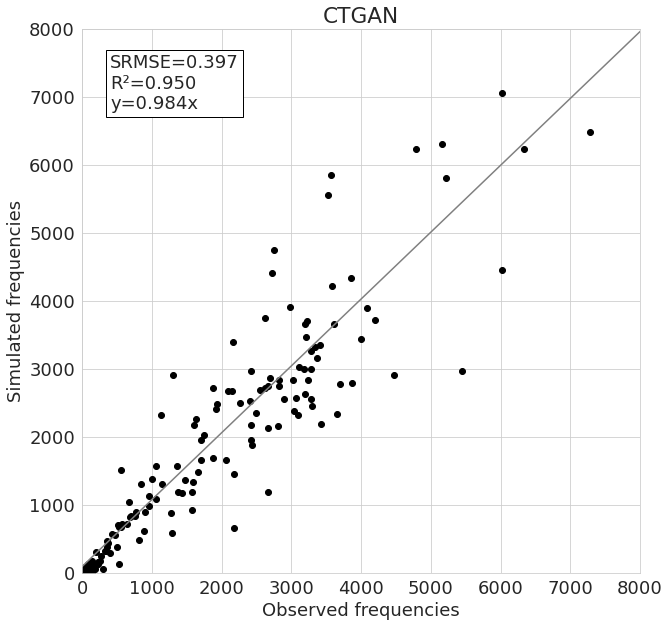

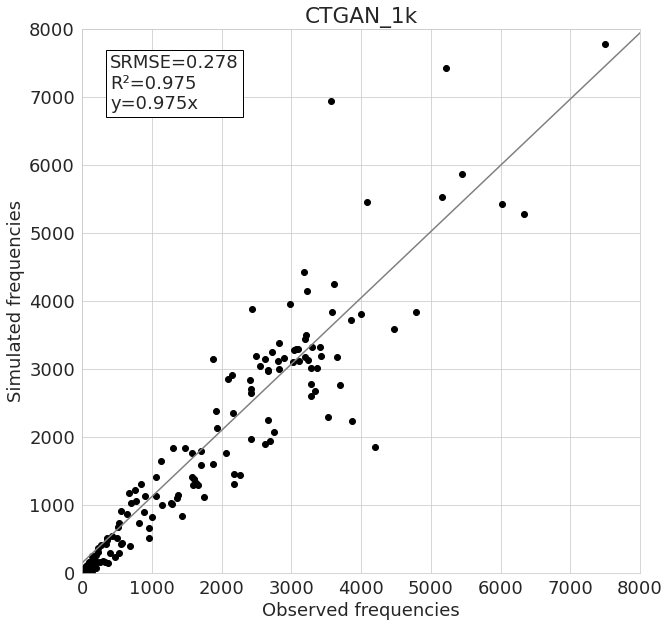

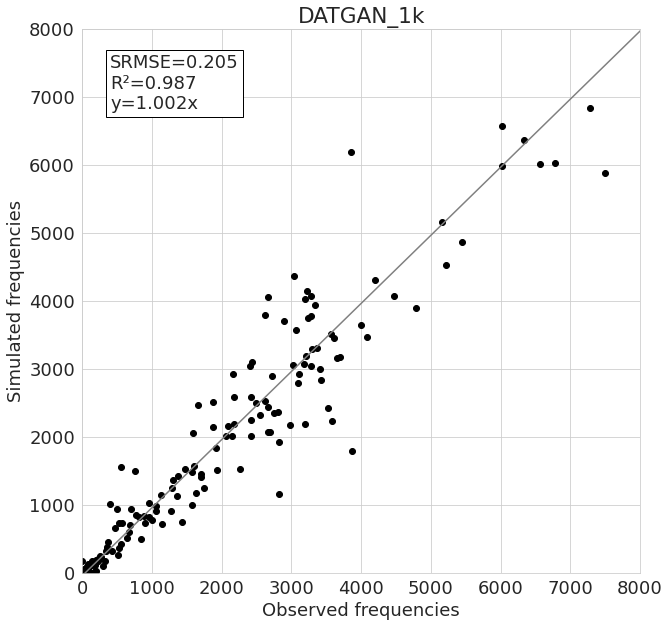

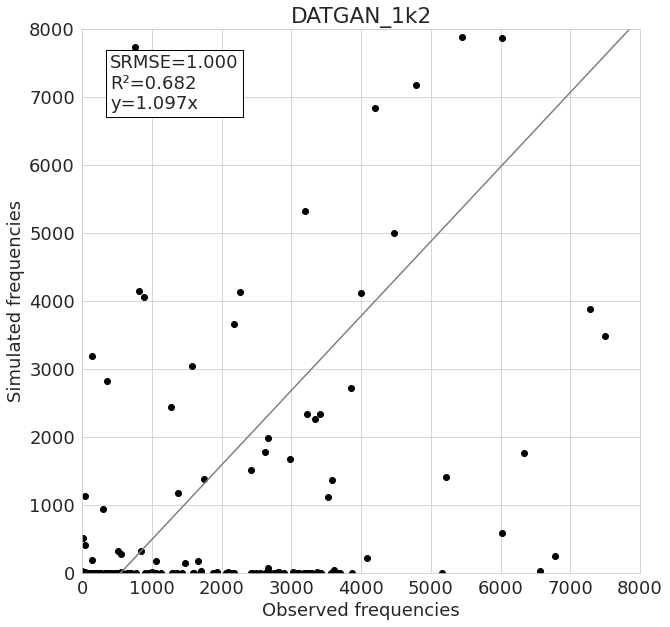

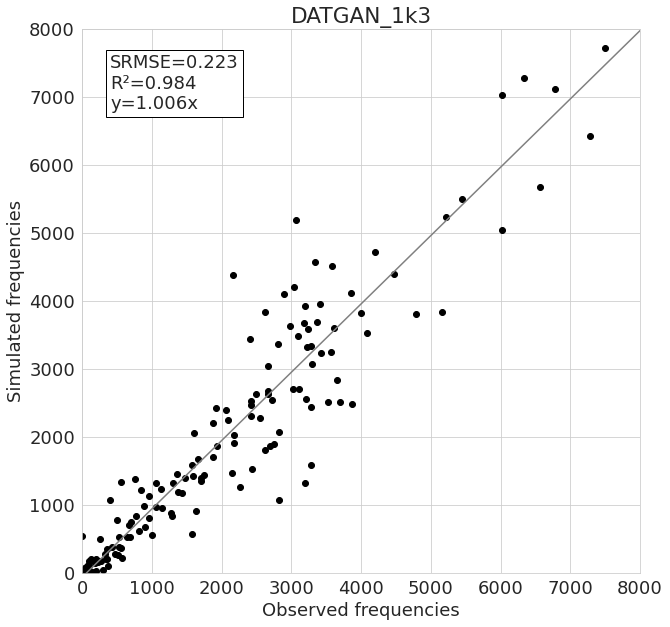

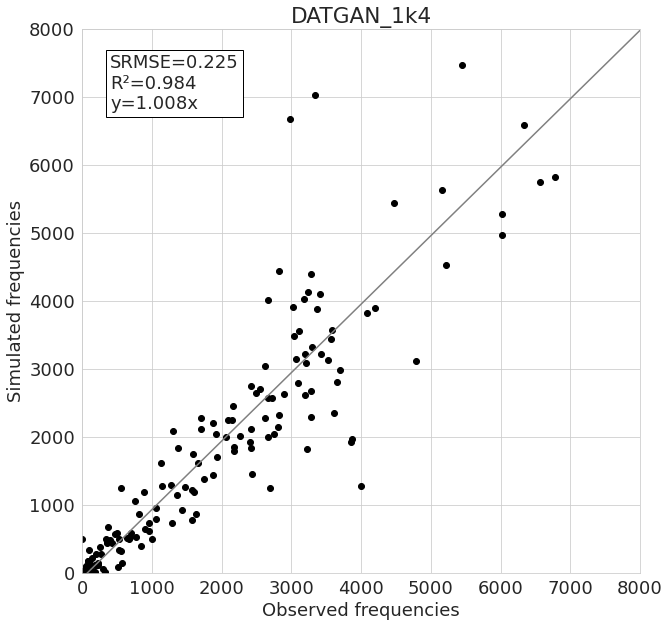

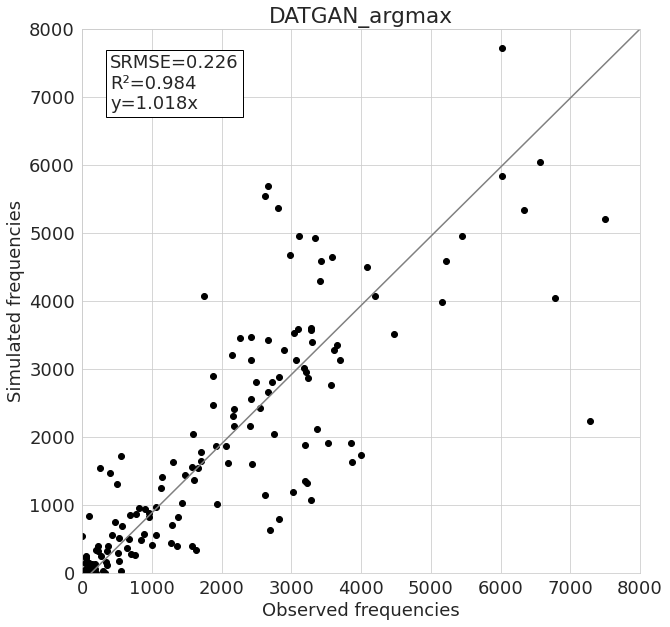

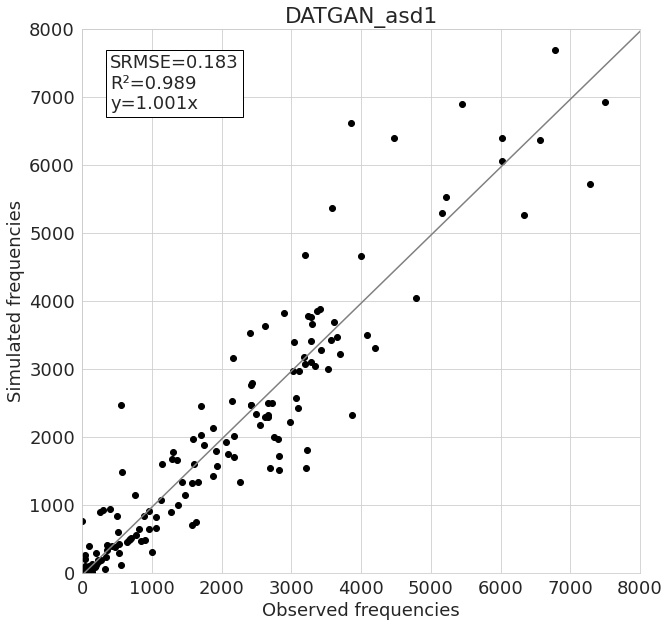

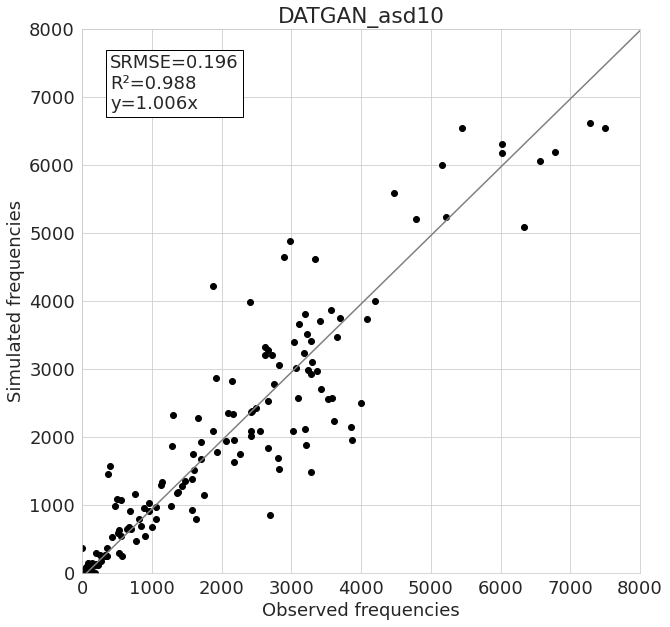

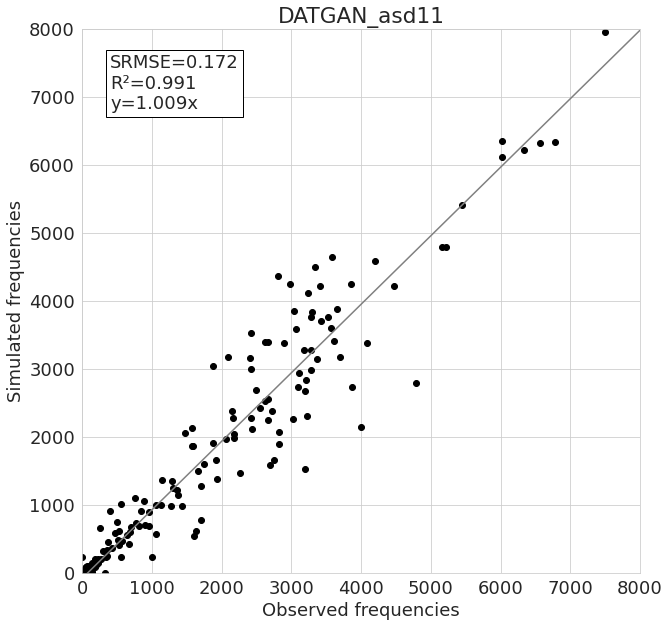

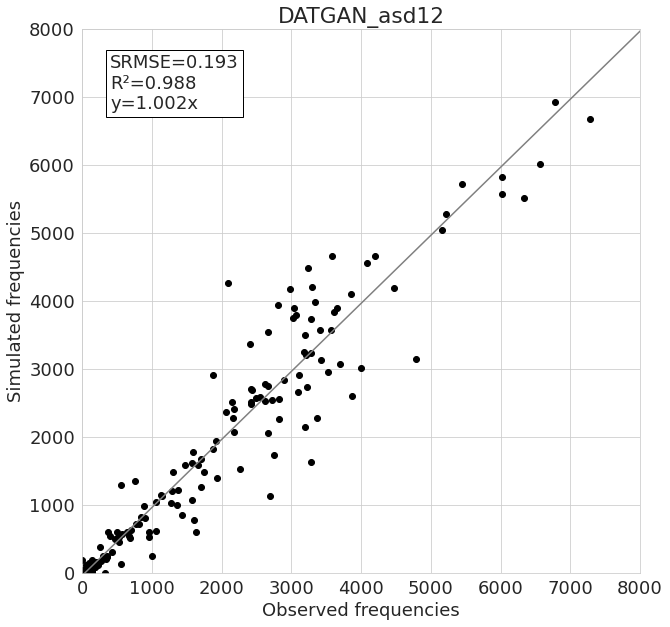

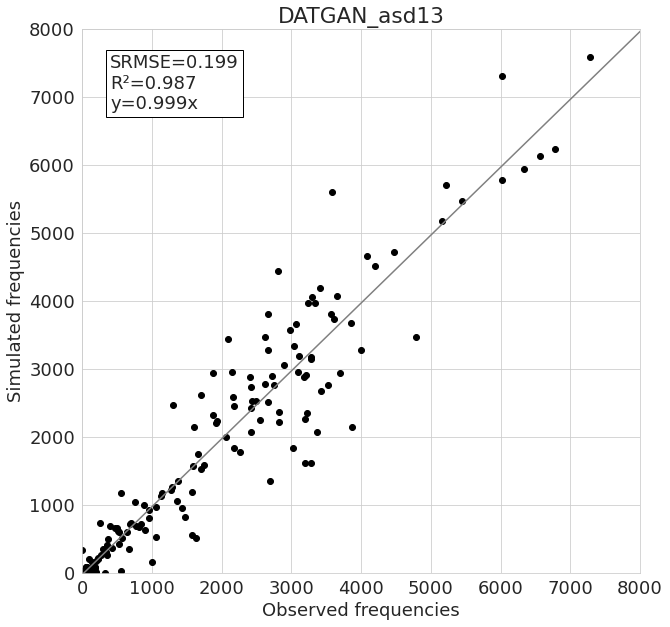

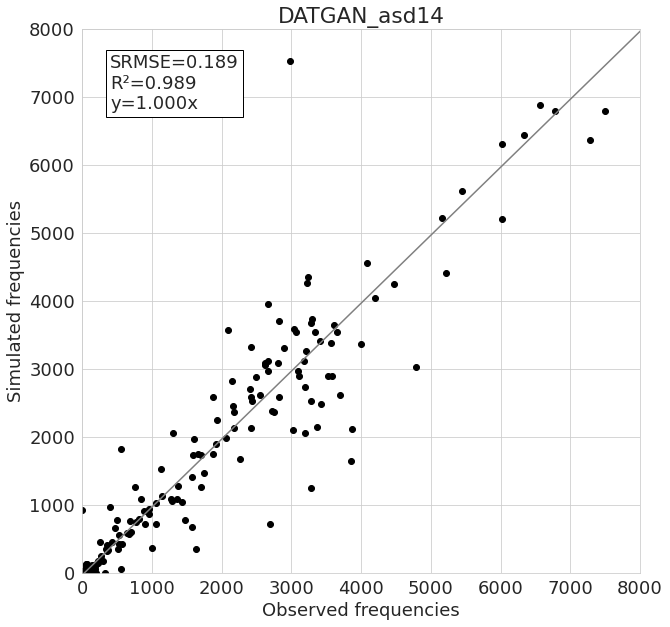

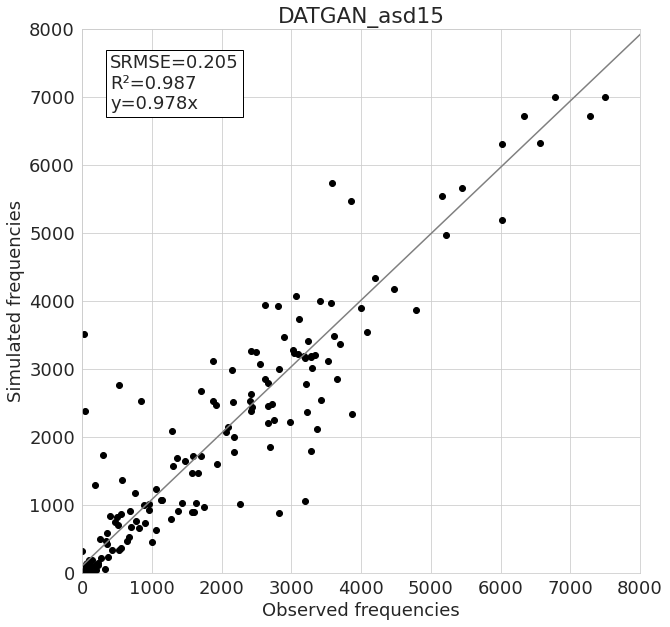

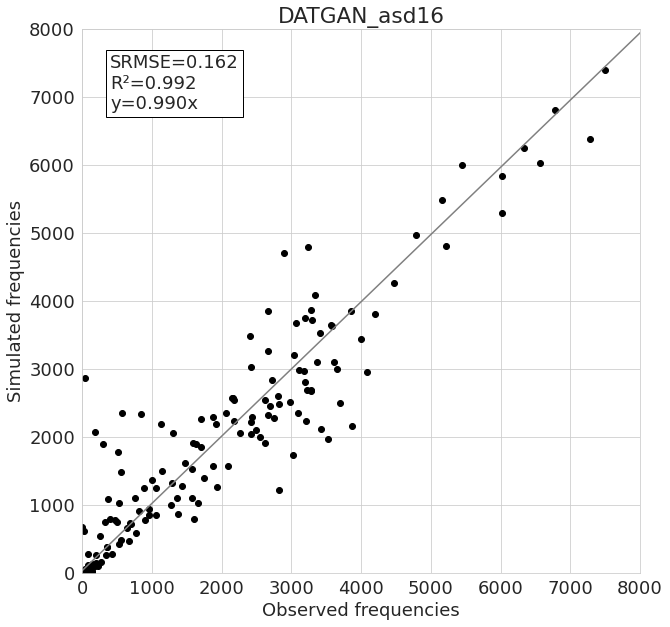

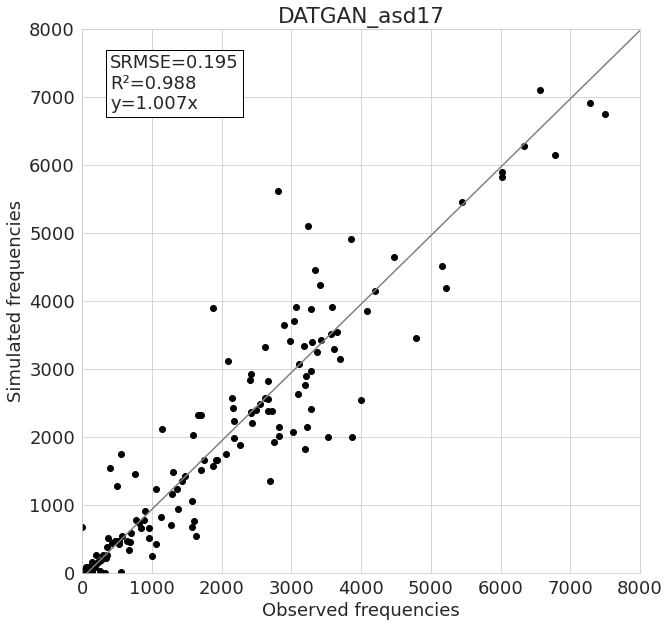

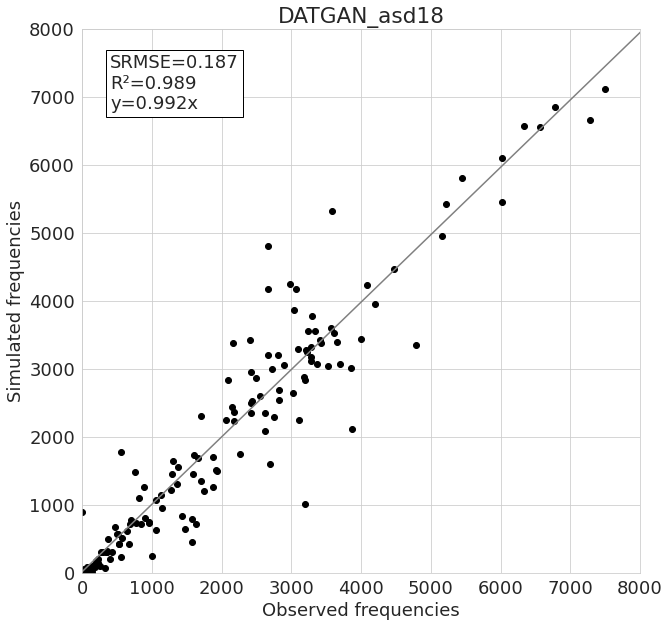

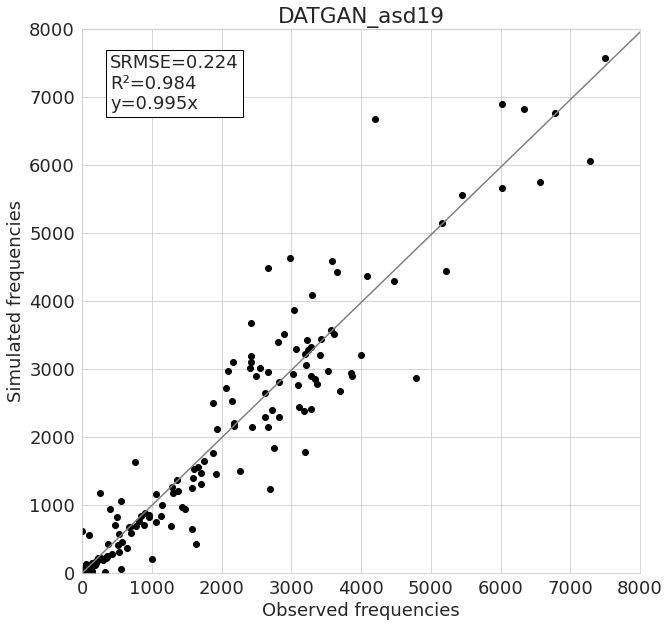

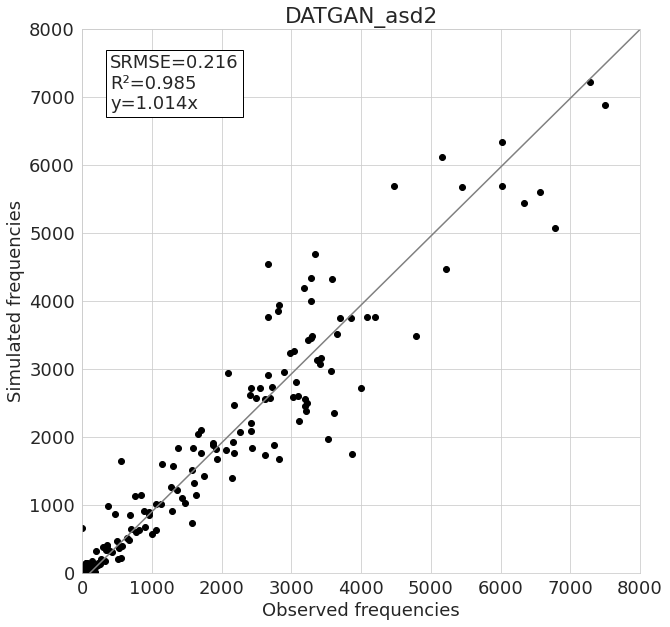

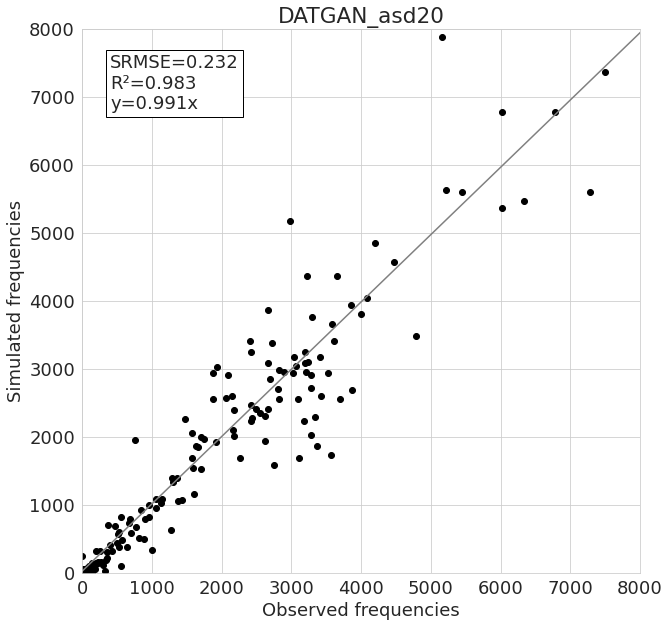

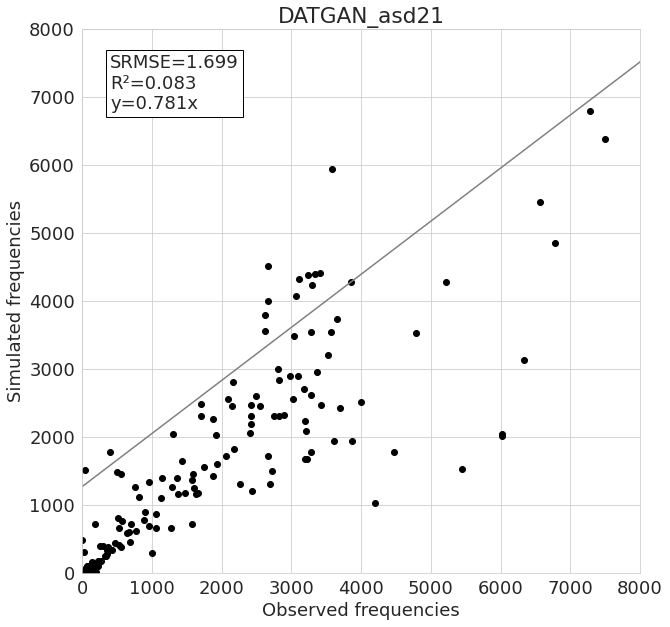

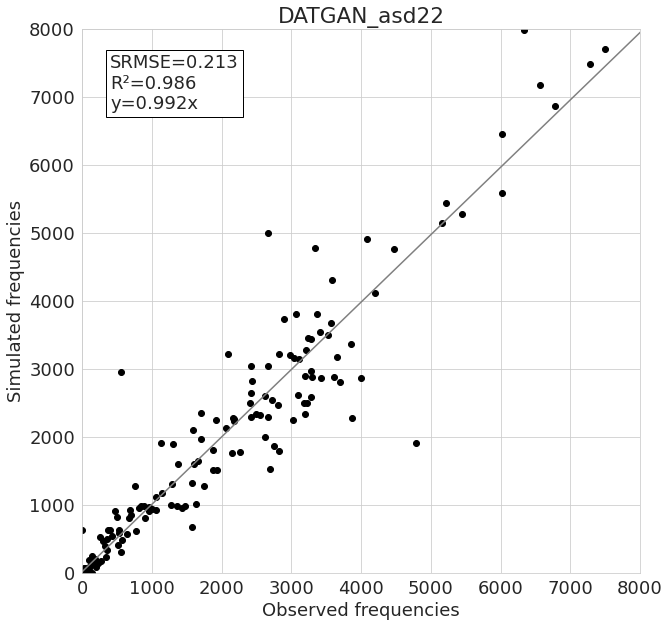

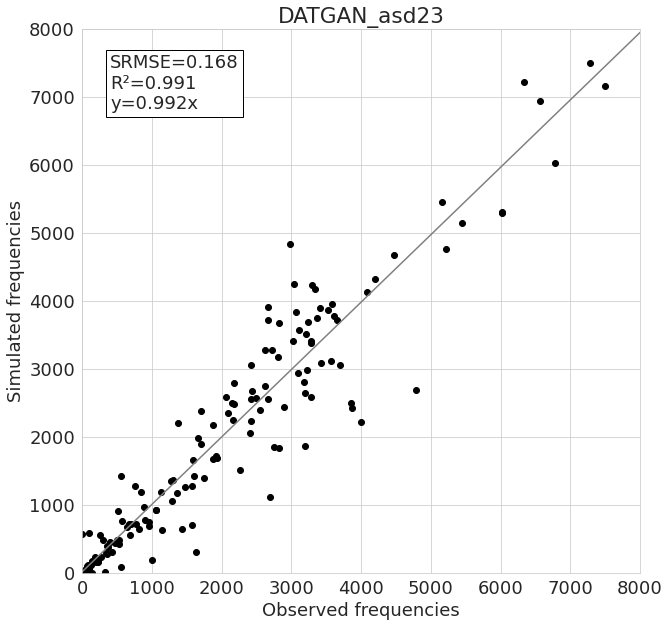

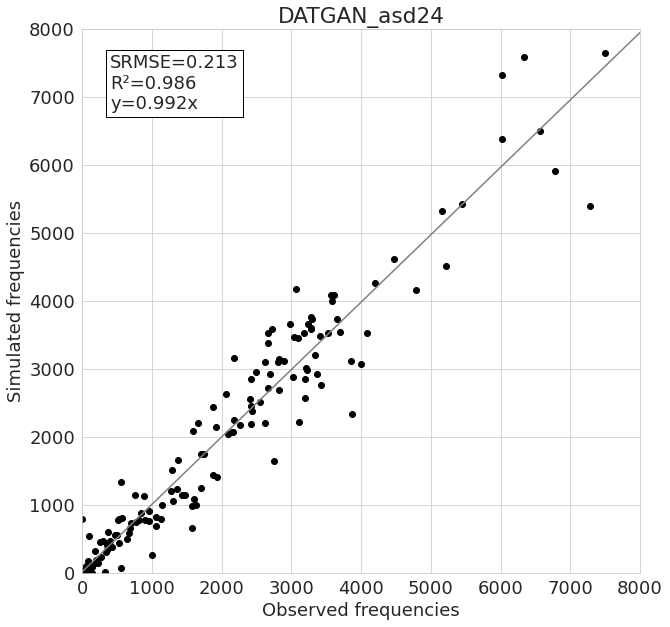

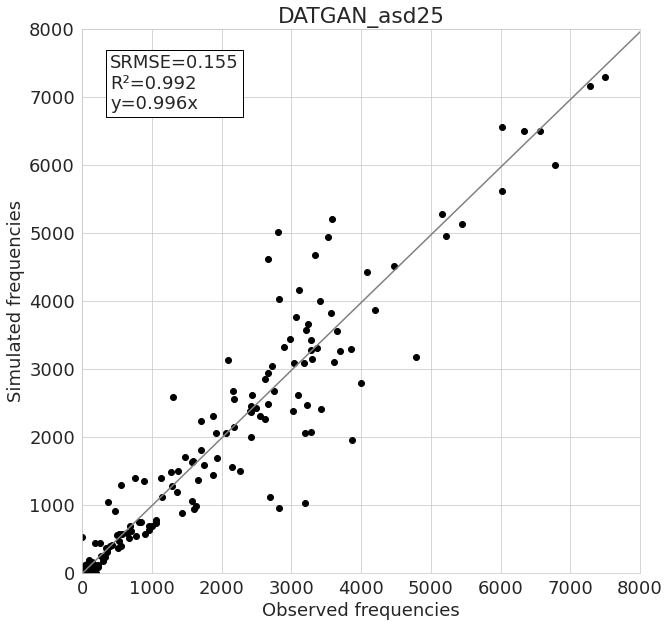

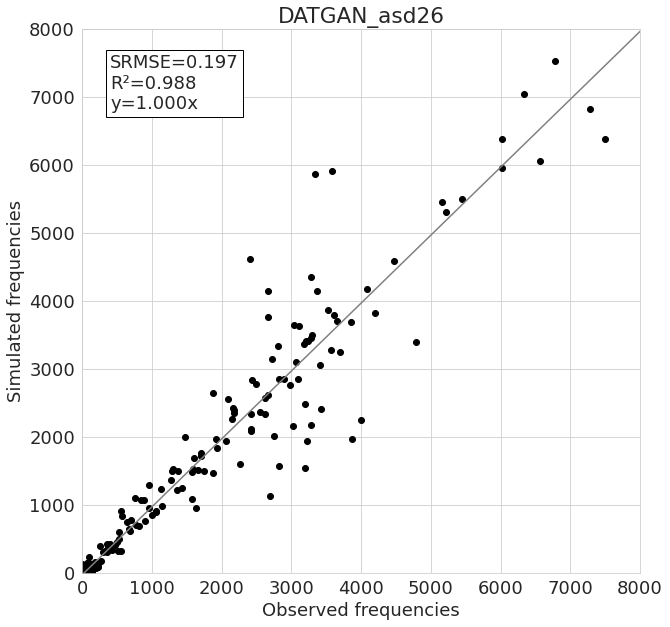

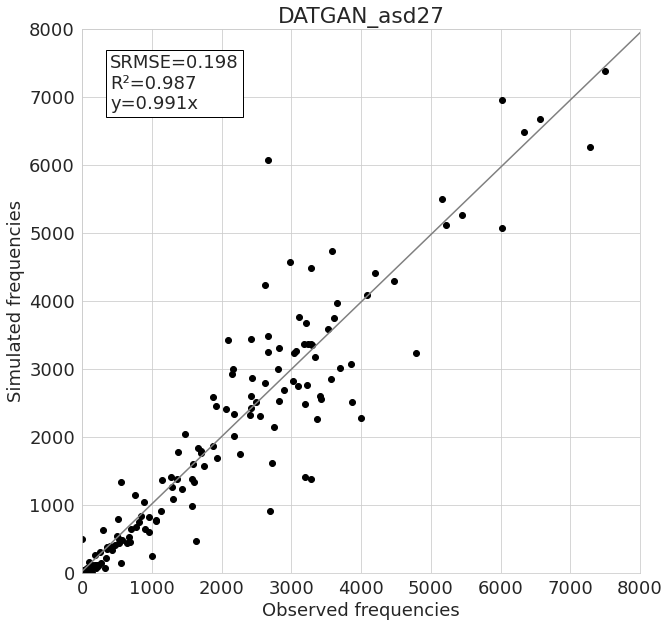

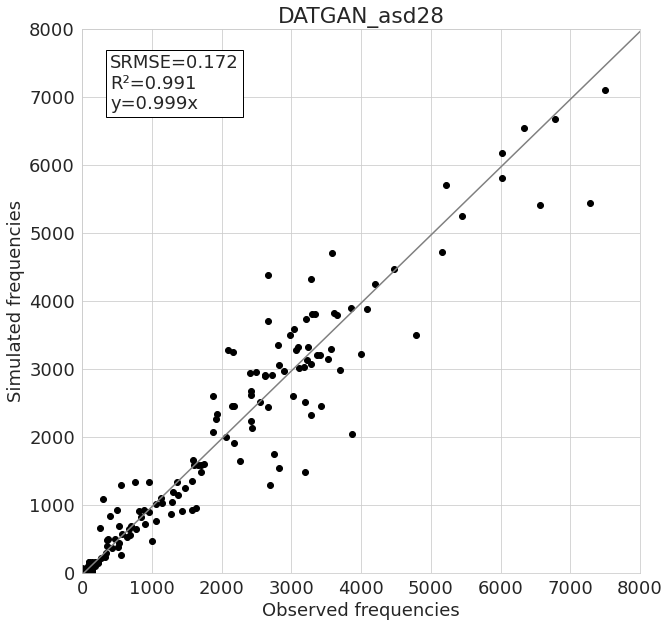

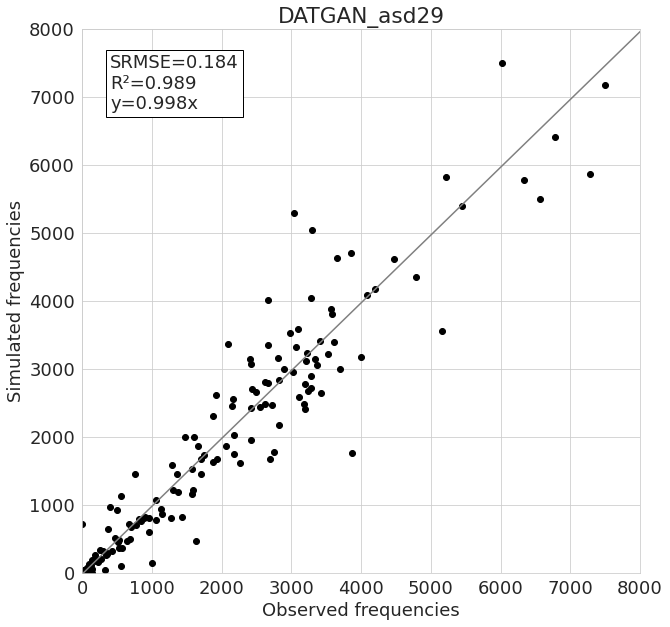

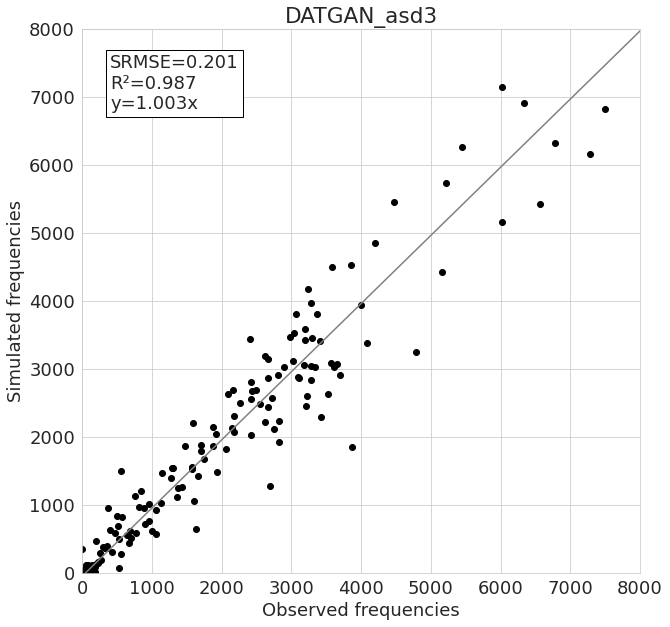

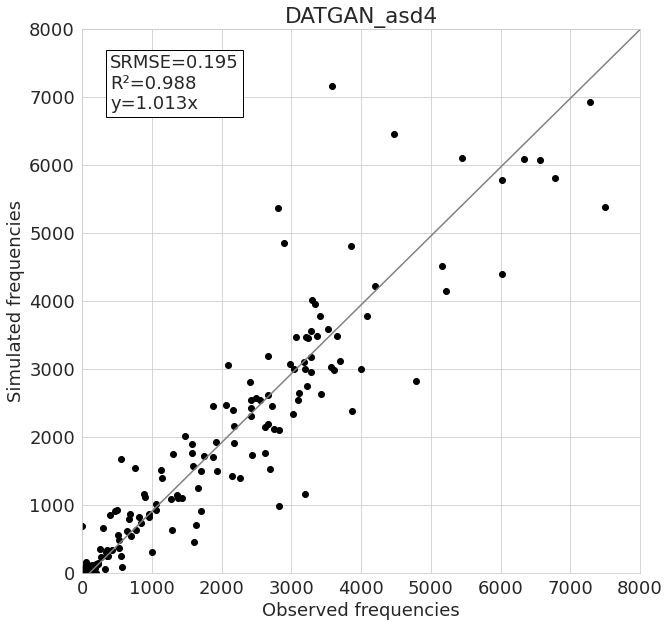

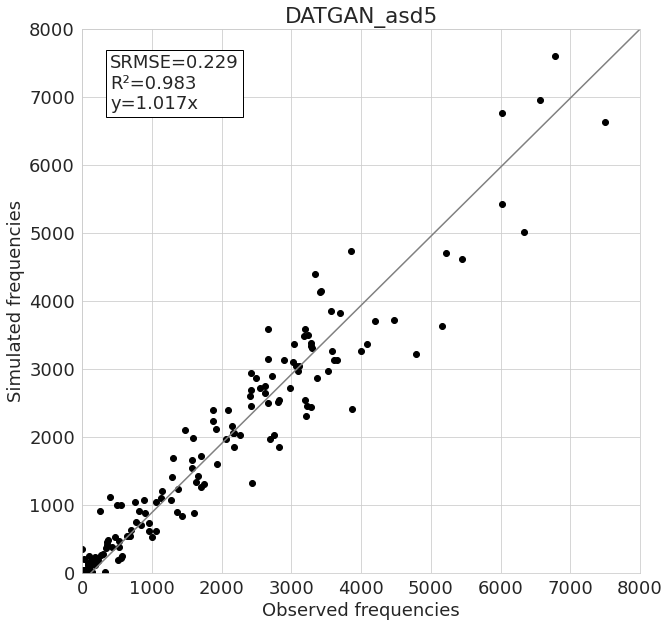

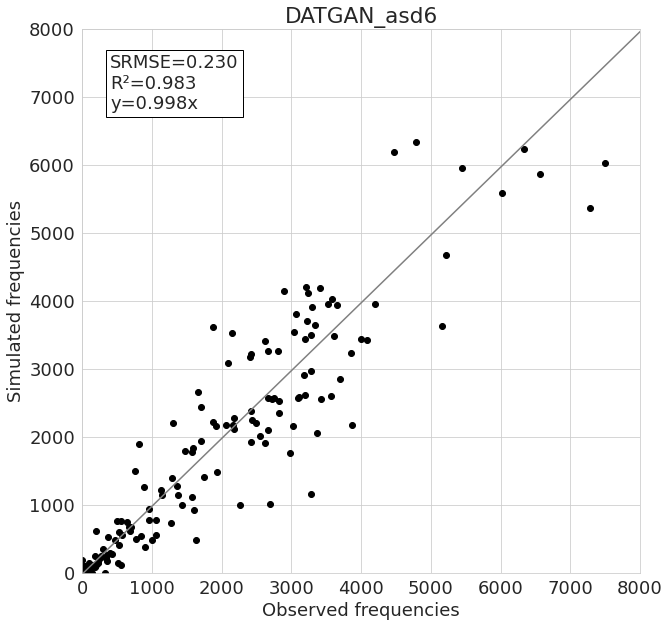

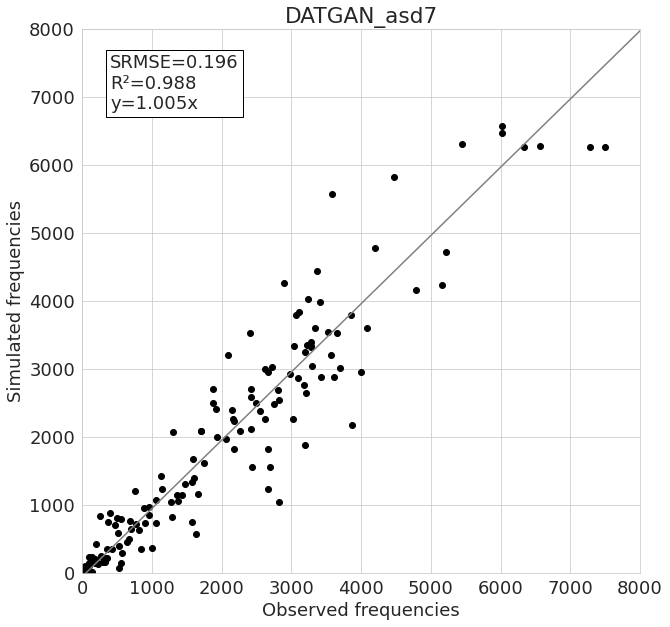

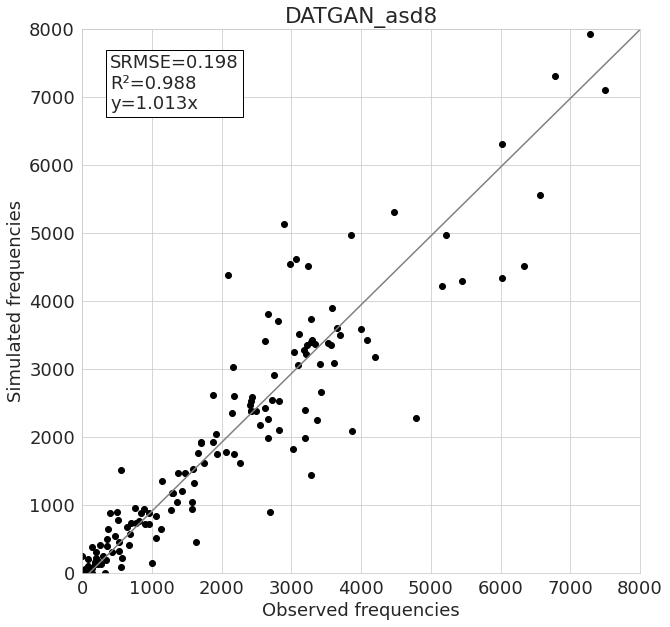

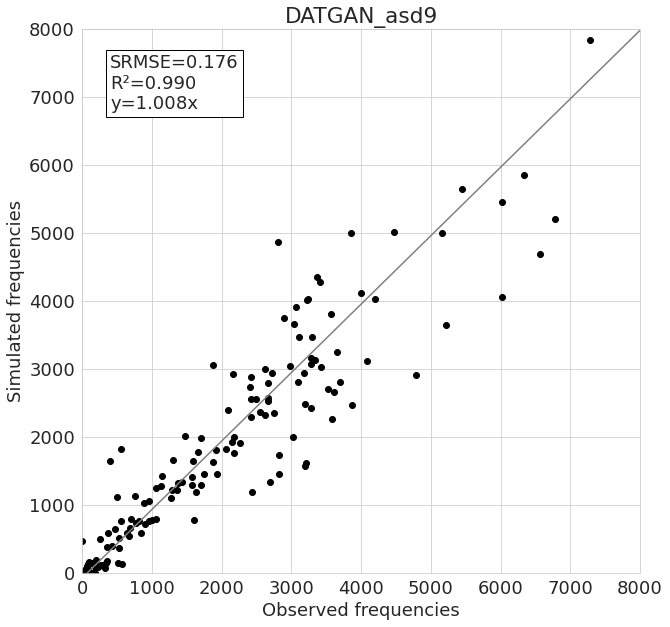

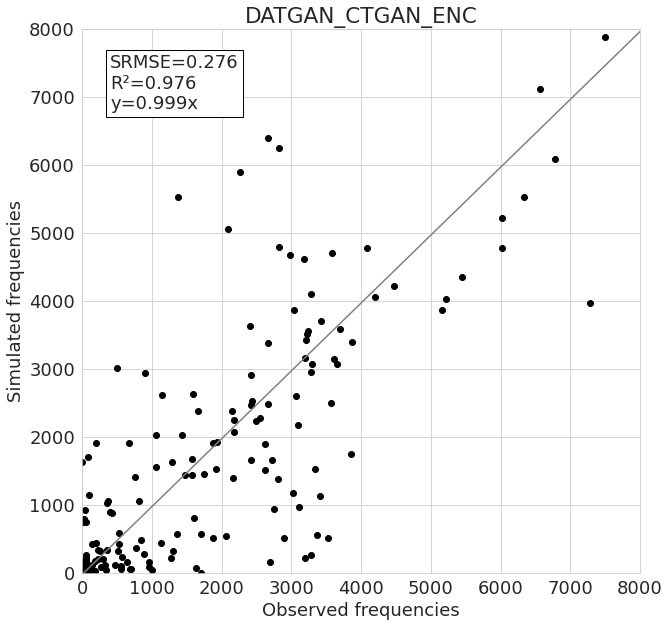

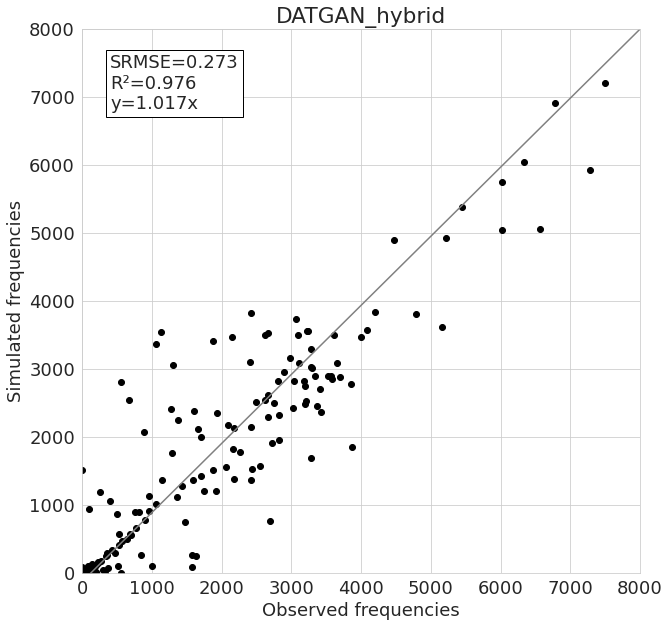

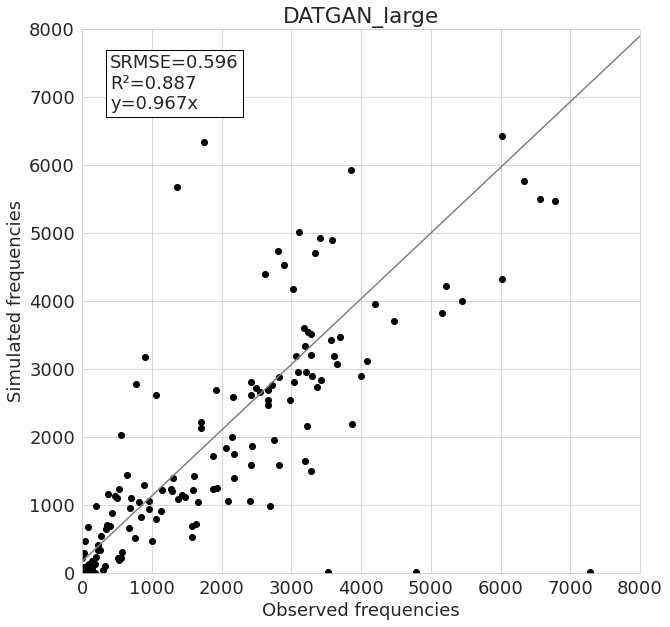

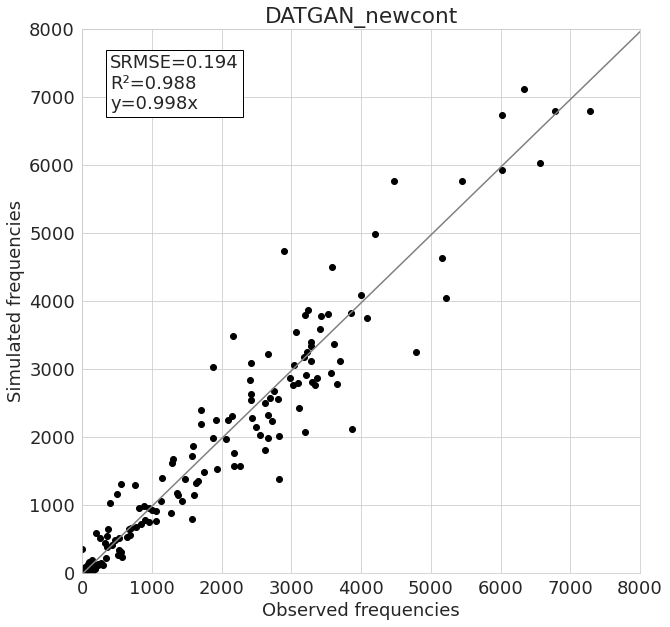

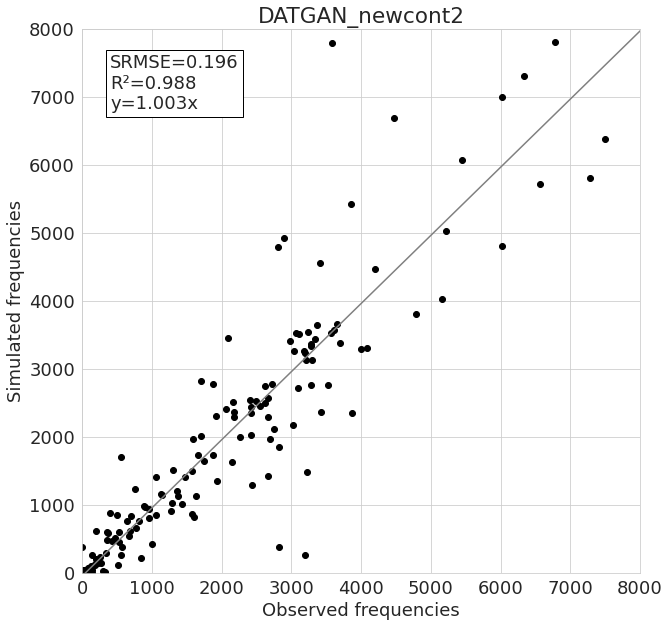

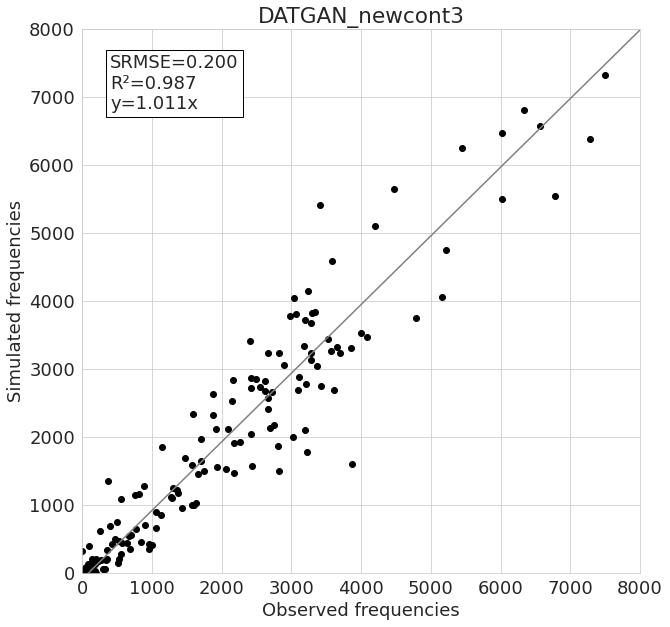

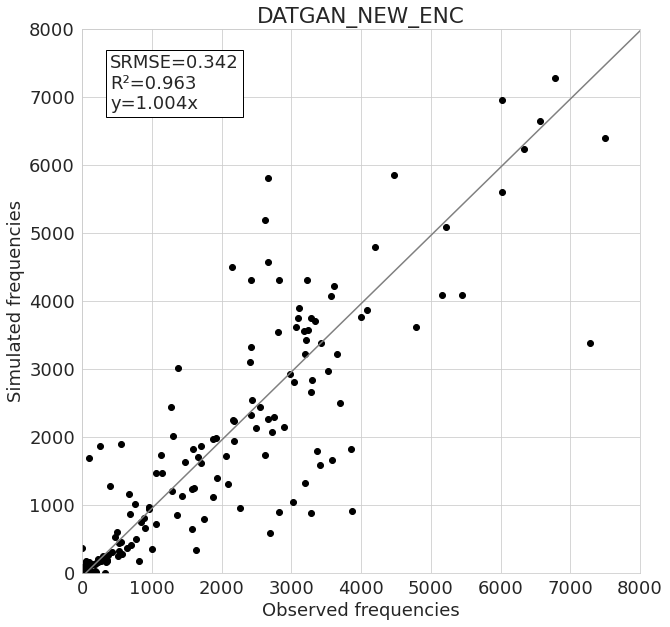

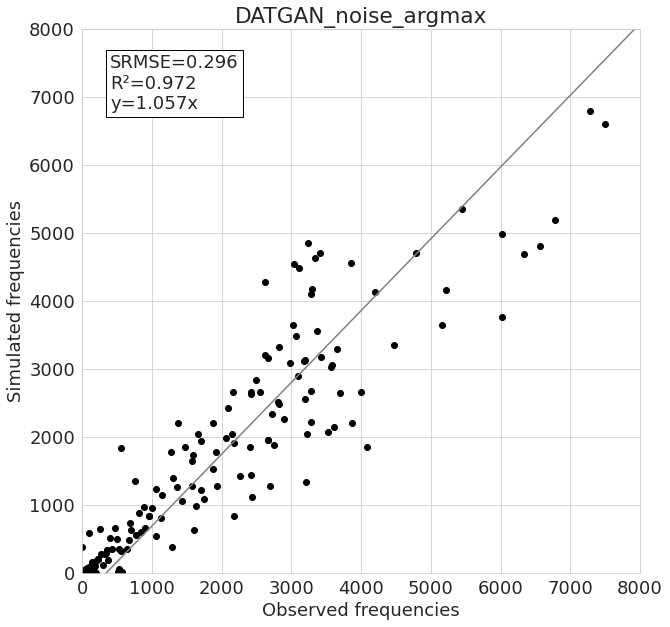

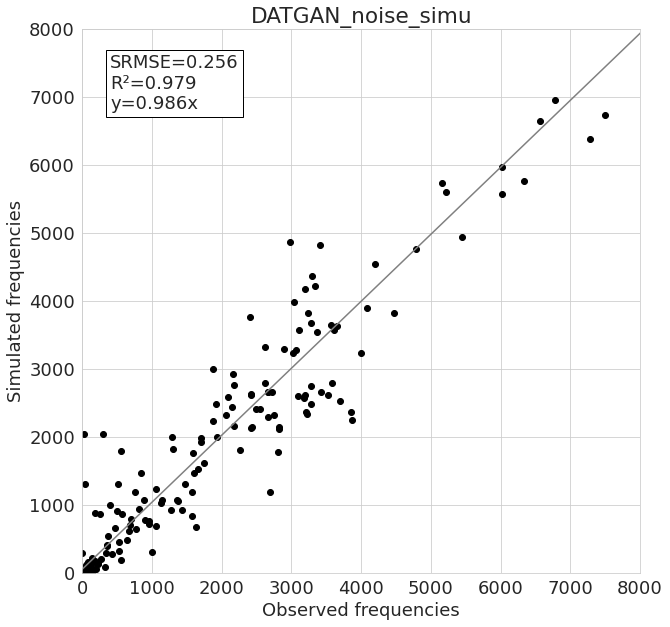

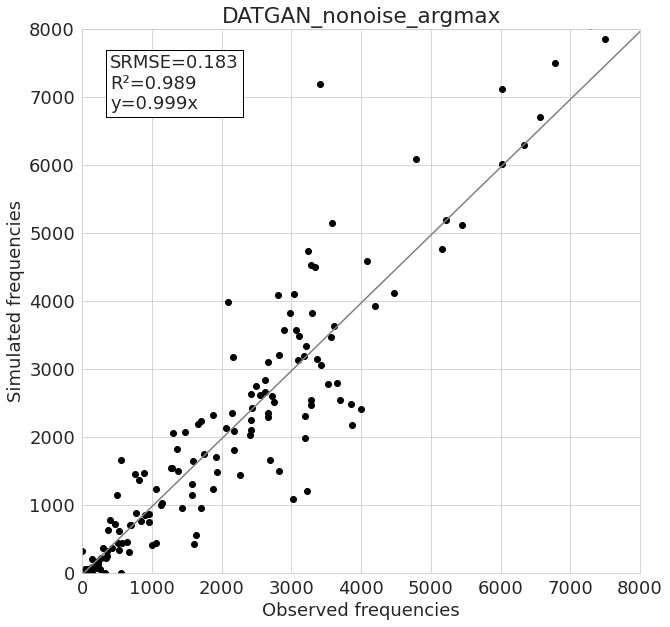

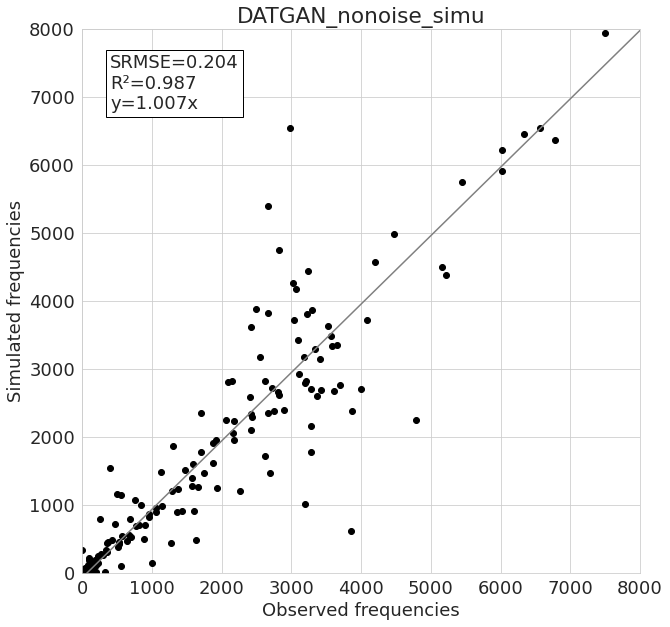

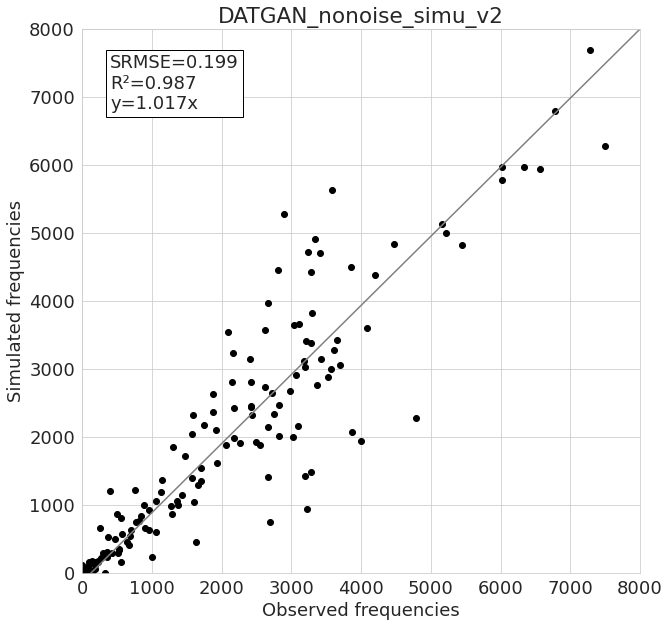

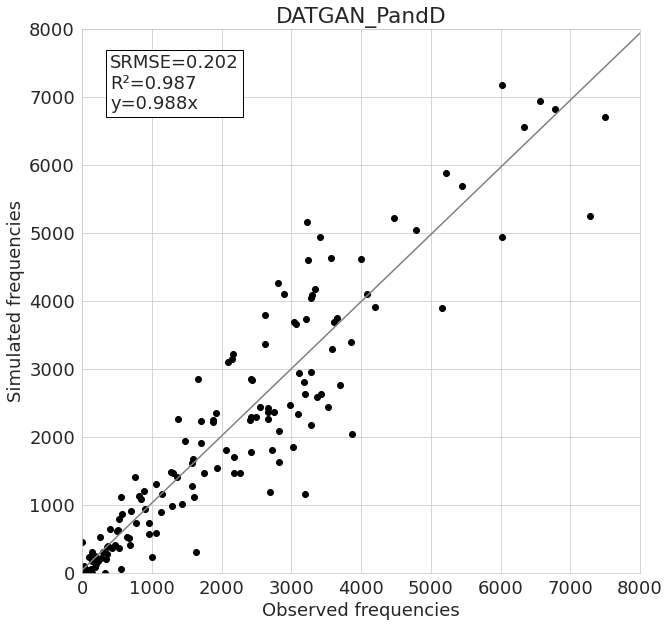

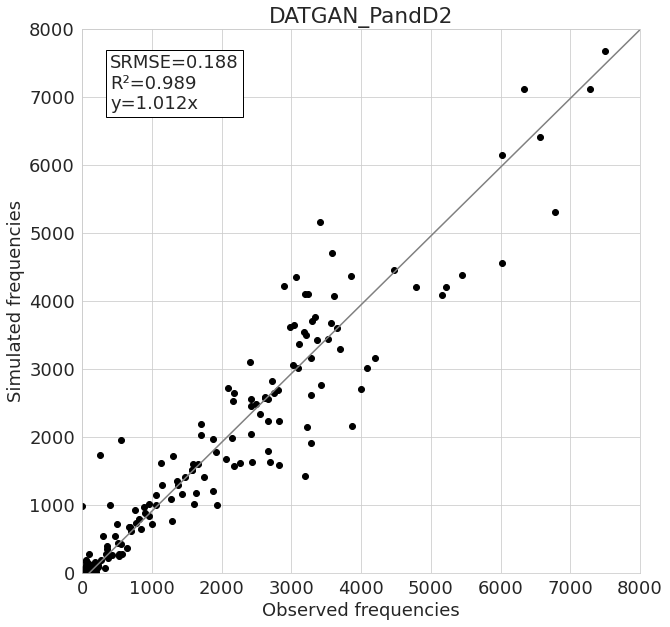

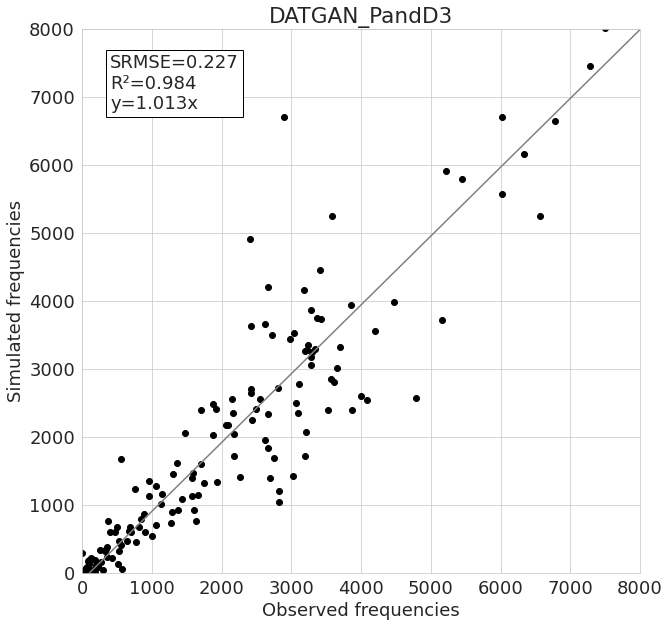

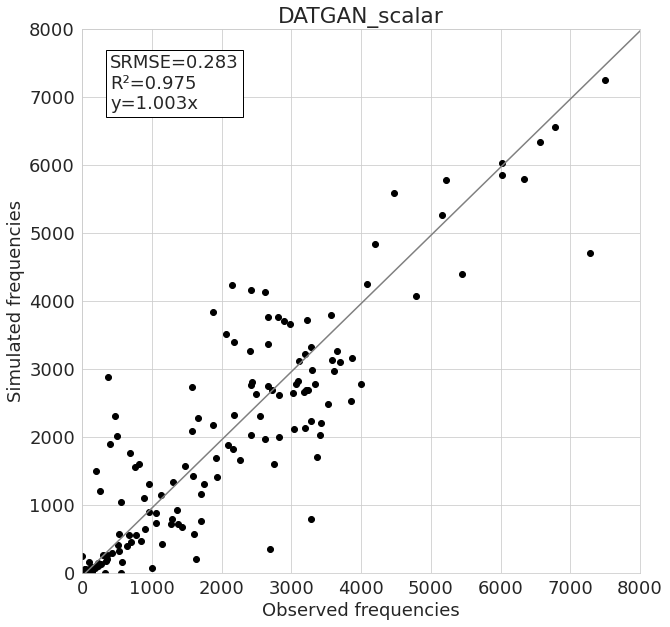

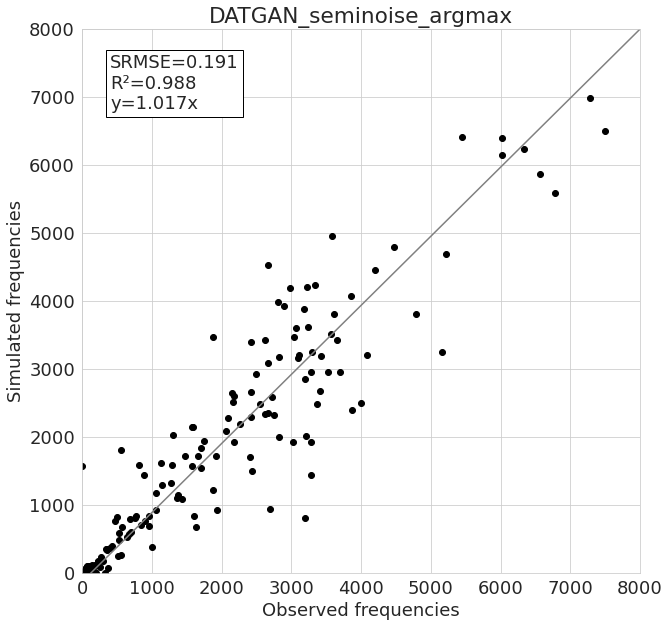

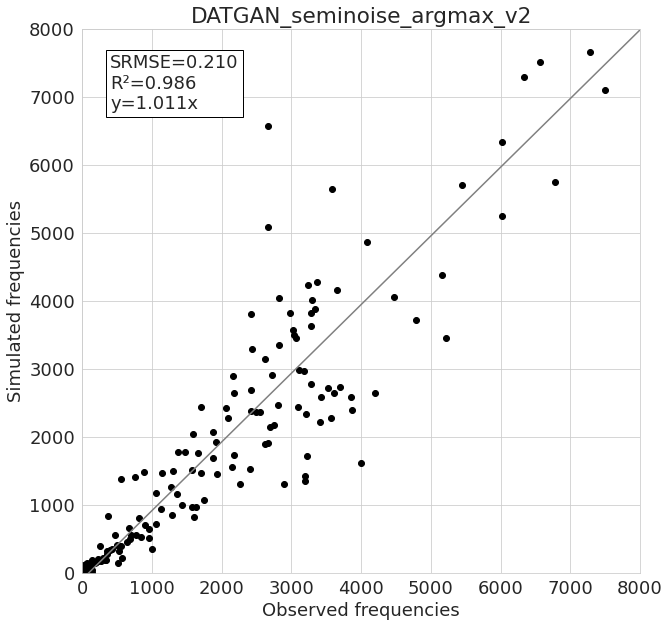

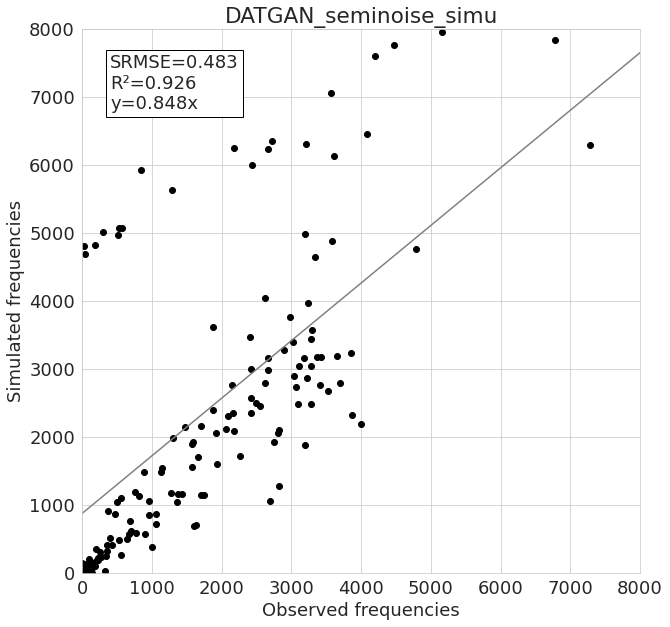

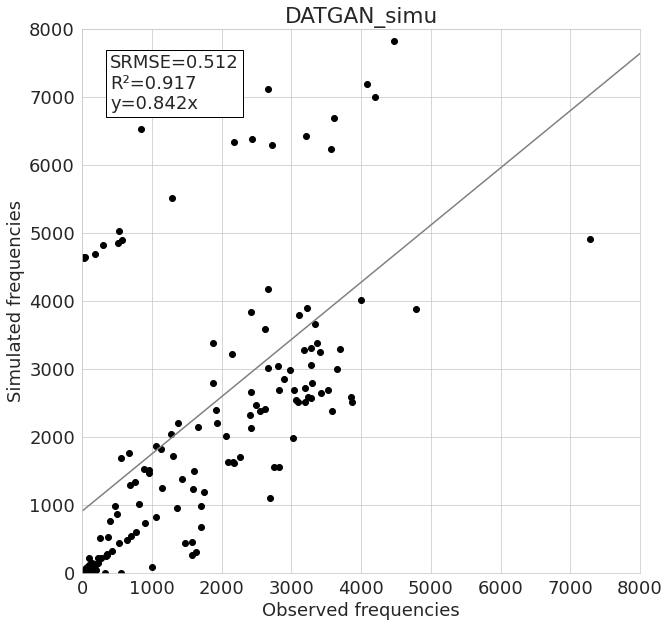

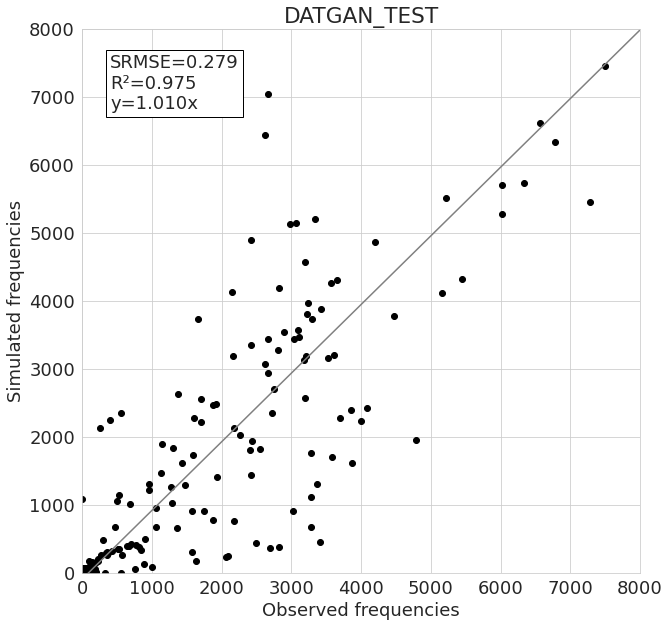

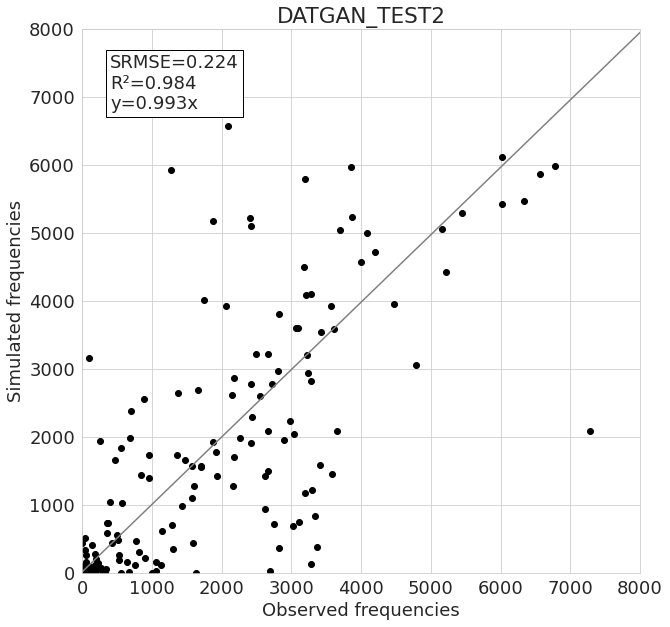

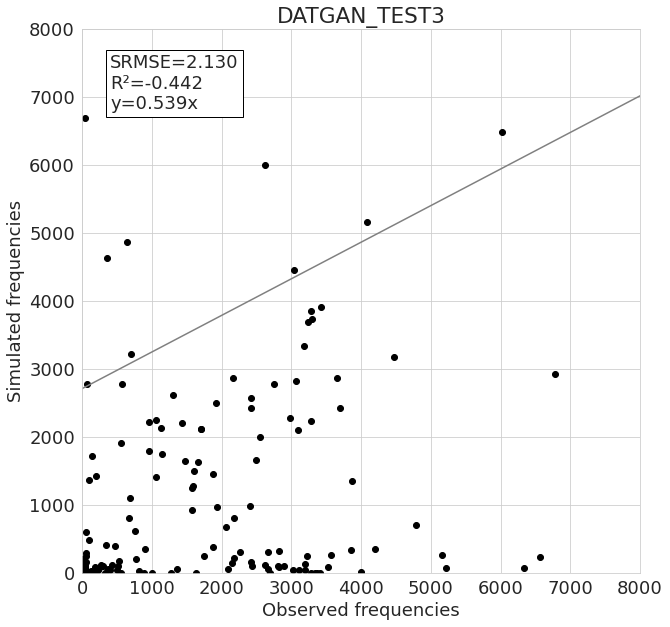

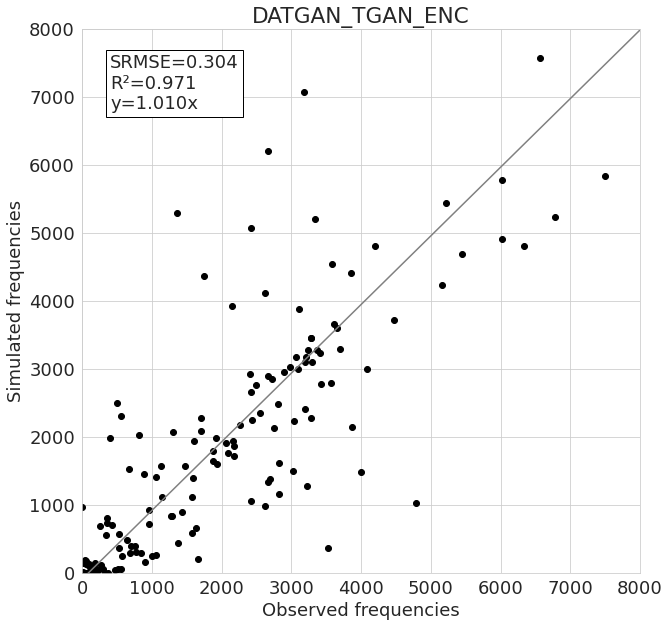

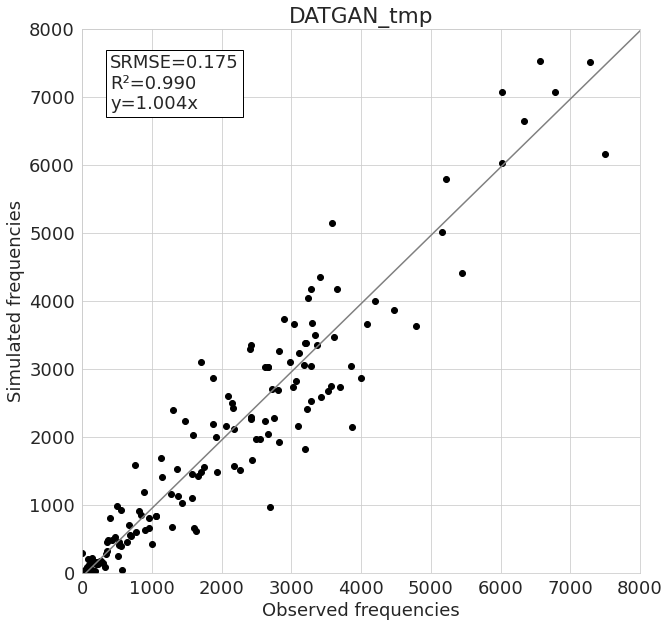

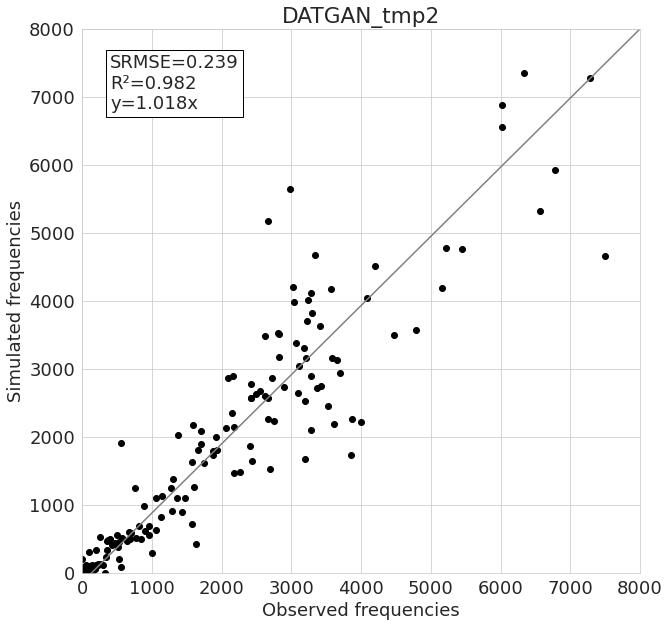

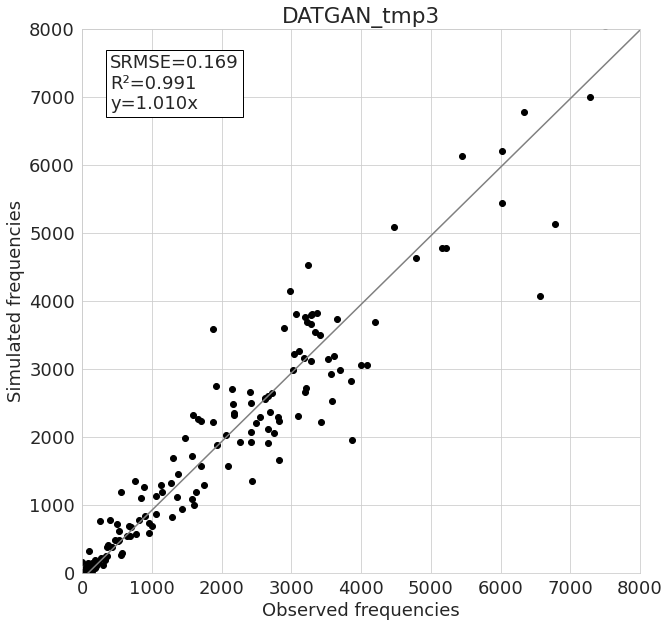

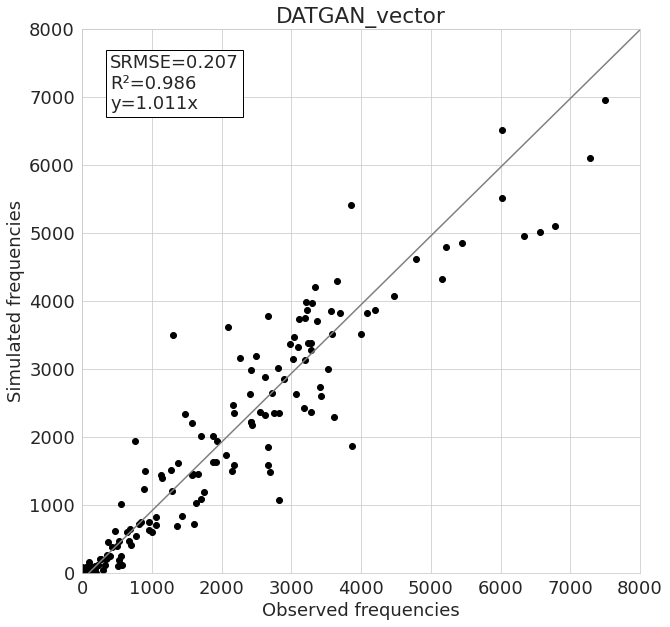

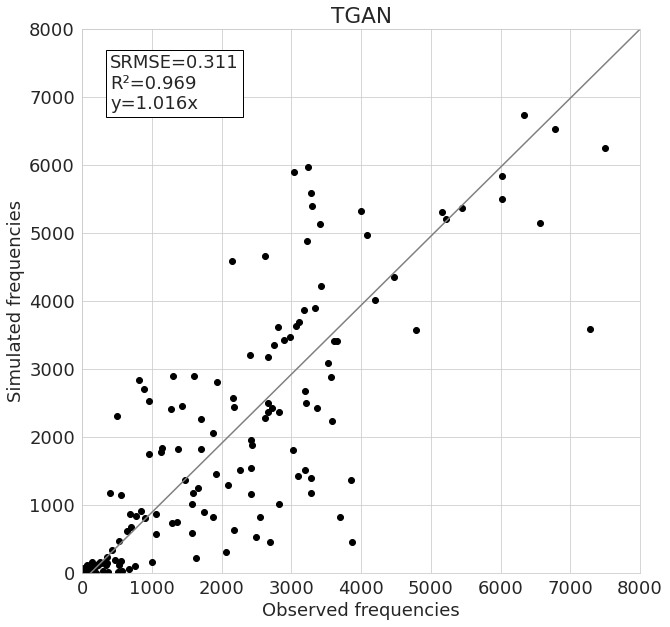

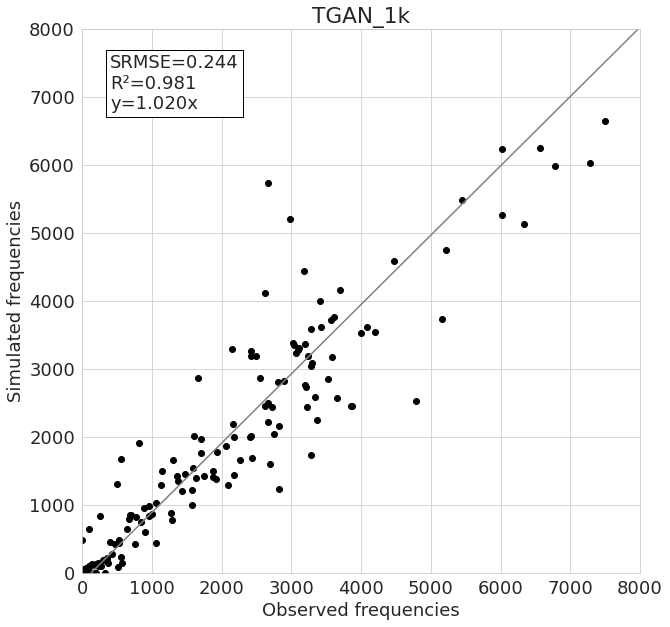

In [22]:
for i in range(len(synth_freqs)):
    plot(orig_freqs, synth_freqs[i], labels[i+1])#, '../figures/' + dataset + '/' + labels[i+1])

# Stats by model

In [23]:
stats_vals = []

for i in range(len(dfs)-1):
    stats_vals.append({'mae': [], 'rmse': [], 'r2': [], 'srmse': [], 'corr': []})

for c in dfs[0].columns:
    for i in range(1, len(dfs)):
        
        [a,b],bins = get_frequency_list(dfs[0][c], dfs[i][c], 50)
        
        stat = stats(a,b)
        
        for k in stat.keys():
            stats_vals[i-1][k].append(stat[k])
            
n = len(stats_vals)

msk = []
for i in dfs[0].columns:
    if i in continuous_cols:
        msk.append(True)
    else:
        msk.append(False)
msk = np.array(msk)

In [24]:
stat = 'srmse'

print("Weighted average of {} (continuous / categorical)".format(stat.upper()))
for i in range(n):
    print("  {}: {:.3f} +- {:.3f} ({:.3f} +- {:.3f} / {:.3f} +- {:.3f})".format(
        labels[i+1], 
        np.mean(np.array(stats_vals[i]['srmse'])),
        np.std(np.array(stats_vals[i]['srmse'])),
        np.mean(np.array(stats_vals[i]['srmse'])[msk]), 
        np.std(np.array(stats_vals[i]['srmse'])[msk]), 
        np.mean(np.array(stats_vals[i]['srmse'])[~msk]), 
        np.std(np.array(stats_vals[i]['srmse'])[~msk])))

Weighted average of SRMSE (continuous / categorical)
  CTGAN: 0.297 +- 0.217 (0.513 +- 0.334 / 0.243 +- 0.128)
  CTGAN_1k: 0.189 +- 0.106 (0.221 +- 0.027 / 0.181 +- 0.117)
  DATGAN_1k: 0.100 +- 0.115 (0.314 +- 0.090 / 0.046 +- 0.016)
  DATGAN_1k2: 0.786 +- 0.882 (2.234 +- 0.711 / 0.424 +- 0.437)
  DATGAN_1k3: 0.110 +- 0.103 (0.304 +- 0.021 / 0.061 +- 0.038)
  DATGAN_1k4: 0.118 +- 0.129 (0.342 +- 0.118 / 0.062 +- 0.040)
  DATGAN_argmax: 0.199 +- 0.283 (0.644 +- 0.378 / 0.088 +- 0.049)
  DATGAN_asd1: 0.108 +- 0.116 (0.307 +- 0.121 / 0.058 +- 0.028)
  DATGAN_asd10: 0.103 +- 0.095 (0.258 +- 0.110 / 0.064 +- 0.028)
  DATGAN_asd11: 0.105 +- 0.107 (0.315 +- 0.024 / 0.053 +- 0.018)
  DATGAN_asd12: 0.090 +- 0.084 (0.245 +- 0.058 / 0.051 +- 0.019)
  DATGAN_asd13: 0.084 +- 0.089 (0.244 +- 0.073 / 0.044 +- 0.025)
  DATGAN_asd14: 0.078 +- 0.096 (0.245 +- 0.097 / 0.037 +- 0.019)
  DATGAN_asd15: 0.116 +- 0.116 (0.309 +- 0.081 / 0.067 +- 0.058)
  DATGAN_asd16: 0.114 +- 0.131 (0.357 +- 0.059 / 0.054 +-

In [25]:
for i, l in enumerate(labels):
    if i > 0:
        print(i, l)

1 CTGAN
2 CTGAN_1k
3 DATGAN_1k
4 DATGAN_1k2
5 DATGAN_1k3
6 DATGAN_1k4
7 DATGAN_argmax
8 DATGAN_asd1
9 DATGAN_asd10
10 DATGAN_asd11
11 DATGAN_asd12
12 DATGAN_asd13
13 DATGAN_asd14
14 DATGAN_asd15
15 DATGAN_asd16
16 DATGAN_asd17
17 DATGAN_asd18
18 DATGAN_asd19
19 DATGAN_asd2
20 DATGAN_asd20
21 DATGAN_asd21
22 DATGAN_asd22
23 DATGAN_asd23
24 DATGAN_asd24
25 DATGAN_asd25
26 DATGAN_asd26
27 DATGAN_asd27
28 DATGAN_asd28
29 DATGAN_asd29
30 DATGAN_asd3
31 DATGAN_asd4
32 DATGAN_asd5
33 DATGAN_asd6
34 DATGAN_asd7
35 DATGAN_asd8
36 DATGAN_asd9
37 DATGAN_CTGAN_ENC
38 DATGAN_hybrid
39 DATGAN_large
40 DATGAN_newcont
41 DATGAN_newcont2
42 DATGAN_newcont3
43 DATGAN_NEW_ENC
44 DATGAN_noise_argmax
45 DATGAN_noise_simu
46 DATGAN_nonoise_argmax
47 DATGAN_nonoise_simu
48 DATGAN_nonoise_simu_v2
49 DATGAN_PandD
50 DATGAN_PandD2
51 DATGAN_PandD3
52 DATGAN_scalar
53 DATGAN_seminoise_argmax
54 DATGAN_seminoise_argmax_v2
55 DATGAN_seminoise_simu
56 DATGAN_simu
57 DATGAN_TEST
58 DATGAN_TEST2
59 DATGAN_TEST3
60 DA

In [26]:
tmp = {}
tmp['continuous'] = []
tmp['categorical'] = []
stat = 'srmse'

names = ['TGAN_1k', 'CTGAN_1k', 'DATGAN_1k3', 'DATGAN_asd24', 'DATGAN_asd28']
list_ = []
for n in names:
    list_.append(labels.index(n))

for j, m in enumerate(list_):
    tmp['continuous'].append([])
    tmp['categorical'].append([])
    for i, c in enumerate(dfs[0].columns):
        name = 'continuous' if c in continuous_cols else 'categorical'
        tmp[name][j].append(stats_vals[m-1]['srmse'][i])

Text(0, 0.5, 'SRMSE')

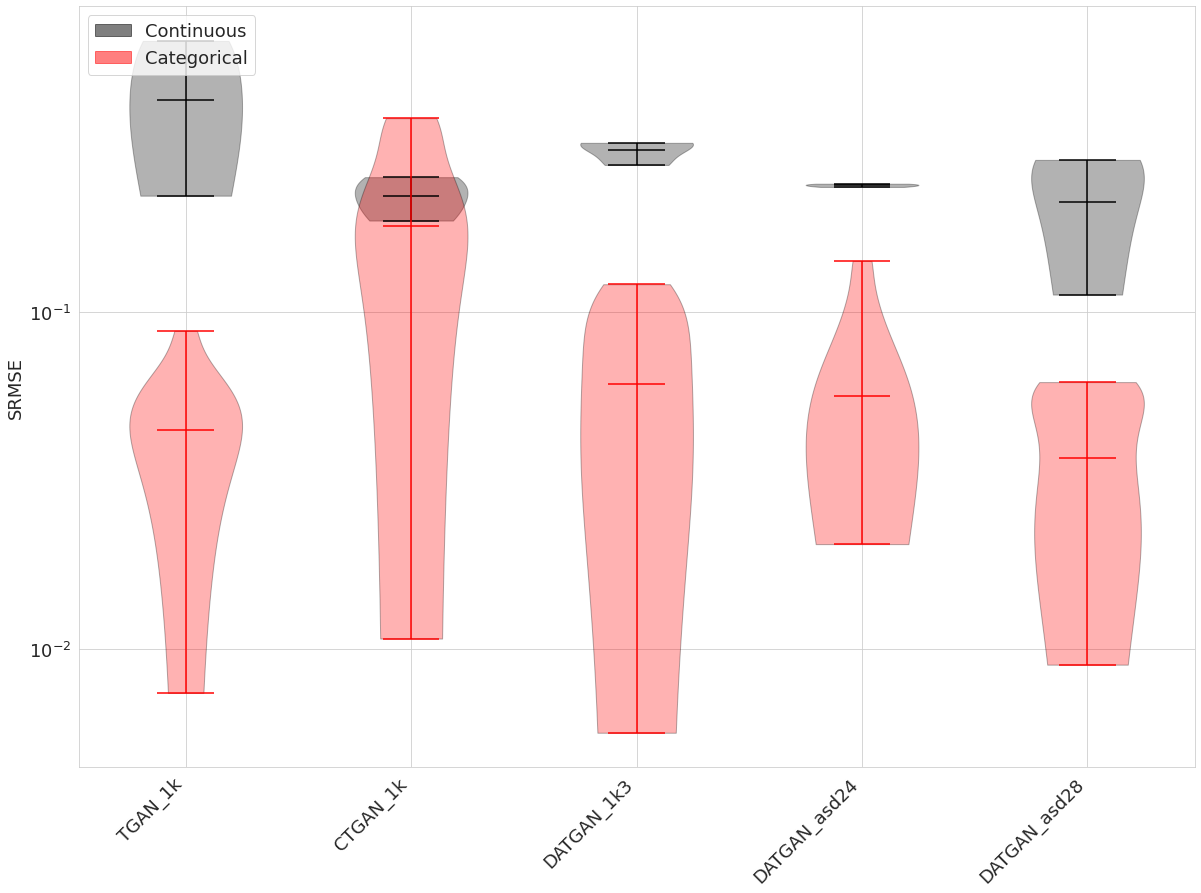

In [27]:
plt.figure(figsize=(20,14), facecolor='white')
parts = plt.violinplot(tmp['continuous'], np.arange(len(list_)), showmeans=True)

for pc in parts['bodies']:
    pc.set_facecolor('black')
    pc.set_edgecolor('black')

parts['cbars'].set_edgecolor('black')
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
parts['cmeans'].set_edgecolor('black')

parts = plt.violinplot(tmp['categorical'], np.arange(len(list_)), showmeans=True)

for pc in parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')

parts['cbars'].set_edgecolor('red')
parts['cmaxes'].set_edgecolor('red')
parts['cmins'].set_edgecolor('red')
parts['cmeans'].set_edgecolor('red')

plt.yscale('log')

# 'fake' invisible object
black_patch = mpatches.Patch(color='black', alpha=0.5)
red_patch = mpatches.Patch(color='red', alpha=0.5)
label = ['Continuous', 'Categorical']

fake_handles = [black_patch, red_patch]
plt.legend(fake_handles, label, loc=2)


plt.xticks(np.arange(len(list_)), np.array(labels)[list_], rotation=45, ha='right')
plt.ylabel(stat.upper())

In [28]:
dfs[0].columns

Index(['choice', 'travel_dow', 'trip_purpose', 'distance', 'hh_vehicles',
       'hh_size', 'hh_bikes', 'hh_descr', 'hh_income', 'gender', 'age',
       'license', 'education_level', 'work_status', 'departure_time'],
      dtype='object')

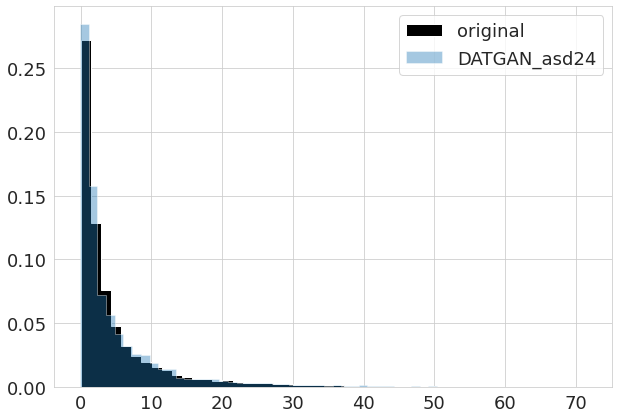

In [29]:
col = 'distance'
to_plot = ['TGAN_1k', 'CTGAN_1k', 'DATGAN_1k']
to_plot = ['DATGAN_asd24']

plt.figure(figsize=(10, 7), facecolor='white')
plt.hist(dfs[0][col], 50, density=True, histtype='stepfilled', alpha=1, color='black', label='original')
for c in to_plot:
    idx = labels.index(c)
    plt.hist(dfs[idx][col], 50, density=True, histtype='stepfilled', alpha=0.4, label=labels[idx])
    
plt.legend()